# **EDA**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Change Matplotlib Default Parameter

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 5
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final Project - Group 7/Colab Notebooks/car_prices.csv', error_bad_lines=False,warn_bad_lines=True)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## No. 1 Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [ ]:
df.isnull().sum().sort_values(ascending = False)

transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
interior          749
odometer           94
year                0
vin                 0
state               0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending = False)/len(df)*100

transmission    11.695010
body             2.361263
condition        2.110553
trim             1.906011
model            1.860915
make             1.843378
color            0.134035
interior         0.134035
odometer         0.016821
year             0.000000
vin              0.000000
state            0.000000
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

In [ ]:
nums = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cats = ['make', 'model', 'trim', 'body', 'transmission','vin','state','color','interior','seller','saledate']

In [ ]:
df.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
557893,2013,Audi,A4,2.0T Premium Plus quattro,Sedan,manual,wauhfafl9da078606,ga,3.2,32630.0,black,gray,sports & imports inc,23400,24000,Thu Jun 18 2015 03:00:00 GMT-0700 (PDT)
522946,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap0cm626340,fl,2.2,32625.0,black,black,nissan infiniti lt,18600,16600,Thu Jun 11 2015 02:15:00 GMT-0700 (PDT)
270,2013,Hyundai,Elantra,GLS,Sedan,automatic,5npdh4ae8dh375848,ca,3.8,38594.0,gray,gray,avis corporation,11350,11800,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
193095,2012,Nissan,Altima,2.5 S,Sedan,automatic,1n4al2ap9cn426673,fl,4.6,13060.0,white,tan,nissan-infiniti lt,13200,13000,Wed Feb 04 2015 01:00:00 GMT-0800 (PST)
258863,2009,Volkswagen,Jetta,S,Sedan,automatic,3vwjm71k39m018792,fl,2.8,62762.0,gray,gray,crown audi,6175,6600,Thu Feb 05 2015 01:50:00 GMT-0800 (PST)


In [ ]:
df[nums].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


**Pengamatan Numericals**:
1. Kolom `year`, `condition`, `odometer`,  tidak ada issue pada nilai min/max,
2. Semua kolom nilainya masih masuk akal
3. Kolom `year`, `condition`, `odometer`, `mmr`, `sellingprice` ada perbedaan antara mean dan median,
4. Kolom `mmr` masih butuh tinjauan lebih lanjut pada pre-processing karena nilai minimum rentangnya lumayan jauh dari mean dan median,
5. Terdapat anomali pada nilai minimum `sellingprice` dicurigai data tidak diketahui sehingga data diimputasi dengan nilai 1 atau mobil yang dijual berupa program perusahaan (hadiah).

In [ ]:
df[cats].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


**Pengamatan Categoricals**:
1. Kolom `transmission` didominasi oleh mobil dengan transmisi automatic (lebih dari 50%),
2. Kolom `vin`, `seller`, `saledate` memiliki kardinalitas yang tinggi (jumlah unique values tinggi),
3. Kolom `color` dan `interior` didominasi oleh mobil dengan warna exterior dan interior black (lebih dari 20%),
4. Kolom `make` didominasi oleh mobil dengan merk Ford (lebih dari 15%).

### Value Counting

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom make:
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: make, Length: 96, dtype: int64

Value count kolom model:
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: model, Length: 973, dtype: int64

Value count kolom trim:
Base                 55817
SE                   43648
LX                   20757
Limited              18356
LT                   16915
                     ...  
xls                      1
4x2 reg silverado        1
awd v8 limited           1
4x2 v6 limited           1
Power Wagon              1
Name: trim, Length: 1975, dtype: int64

Value count kolom body:
Sedan          199437
SUV            119292
seda

**Pengamatan Descriptive Statistics**:
- Data terdiri dari 558811 baris dan 16 kolom,
- Tidak ada issue pada nama dan isi setiap kolom,
- Tampak beberapa kolom masih memiliki null/missing values kolom `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`),
- Missing values terbesar berada pada kolom `transmission` sejumlah 65353 (11.7%) data,
- Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai).

### Duplicate, Unique, and Lowercase/Uppercase Values

In [ ]:
print(df[df.duplicated()].shape)
df.duplicated().any()

(0, 16)


False

Pada dataset ini tidak ada data yang memiliki nilai duplikat.

In [ ]:
# before lowercase data

len(df['make'].unique())

97

In [ ]:
# after lowercase data

df['make'] = df['make'].str.lower()
len(df['make'].unique())

67

Nilai unique data setelah dilakukan handling terhadap kolom `make` dari **97** menjadi **67**.

In [ ]:
# before lowercase data

len(df['model'].unique())

974

In [ ]:
# after lowercase data

df['model'] = df['model'].str.lower()
len(df['model'].unique())

852

Nilai unique data setelah dilakukan handling terhadap kolom `model` dari **974** menjadi **852**.

In [ ]:
# before lowercase data

len(df['body'].unique())

87

In [ ]:
# after lowercase data

df['body'] = df['body'].str.lower()
len(df['body'].unique())

46

Nilai unique data setelah dilakukan handling terhadap kolom `body` dari **87** menjadi **46**.

**Pengamatan Duplicate, Unique, dan Uppercase/Lowercase**:
- Ada perubahan unique data pada kolom `model`, `trim`, dan `body` setelah dilakukan handling pada uppercase dan lowercase,
- Kolom `transmission`, `vin`, `state`, `color`, `interior`, `seller`, dan `saledate` sudah memiliki data yang sesuai (tidak ada issue pada uppercase/lowercase),
- Kolom `year`, `condition`, `odometer`, `mmr`, dan `sellingprice` tidak perlu dilakukan pengecekan dikarenakan tipe data bersifat integer/boolean.

## No. 2 Univariate Analysis

### Box plots (Numericals)

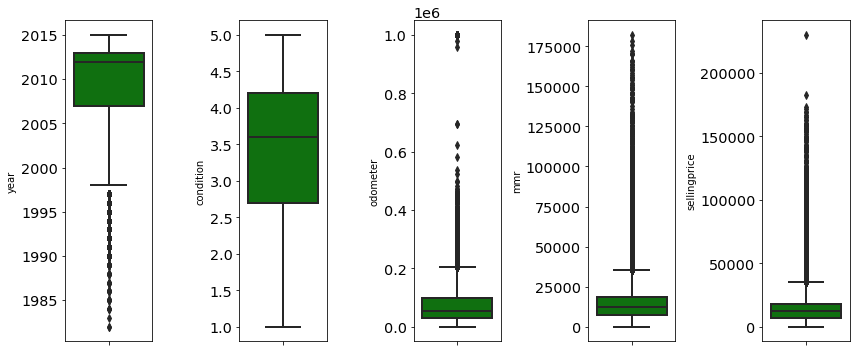

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

**Pengamatan Boxplot**:
- Dari box plot, outlier utamanya terlihat pada kolom `odometer` dan`sellingprice`,
- Kolom yang tampak memiliki distribusi lumayan skew juga terlihat pada `year`, `odometer`, `mmr`, `sellingprice`.

### Dist plots (Numericals)

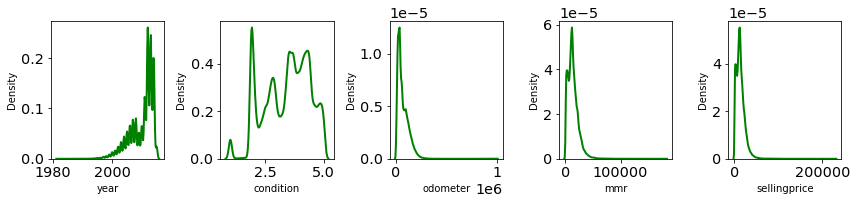

In [ ]:
for i in range(0, len(features)):
    plt.subplot(2, len(features), i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

**Pengamatan Distplot**:
- Seperti observasi pada box plot sebelumnya, kolom `year`, `mmr`, dan `sellingprice` memiliki distribusi yang skew terutama pada kolom `odometer`,
- Kolom `condition` memiliki arah distribusi multimodal dimana distribusinya sudah mendekati normal.

### Violin Plots (Numericals)

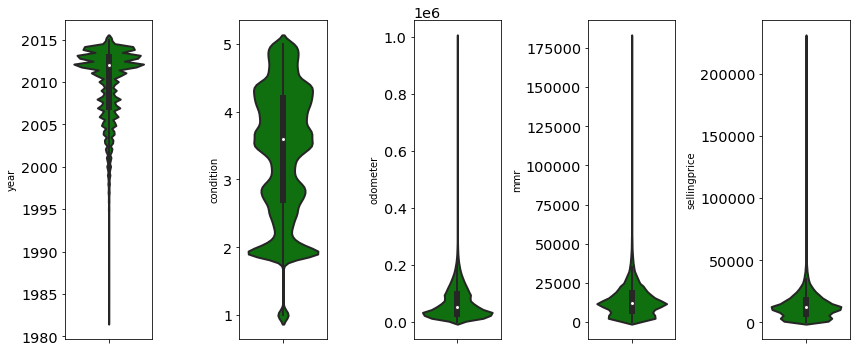

In [ ]:
for i in range(0, len(features)):
    plt.subplot(1, len(features), 1+i)
    sns.violinplot(y=df[features[i]], color = 'green', orient = 'v')
    plt.tight_layout()

### Count Plots (Categoricals)

In [ ]:
print(cats)

['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']


In [ ]:
cats_1 = ['make', 'model', 'trim', 'body', 'transmission']
cats_2 = ['vin', 'state', 'color', 'interior', 'seller', 'saledate']

#### make

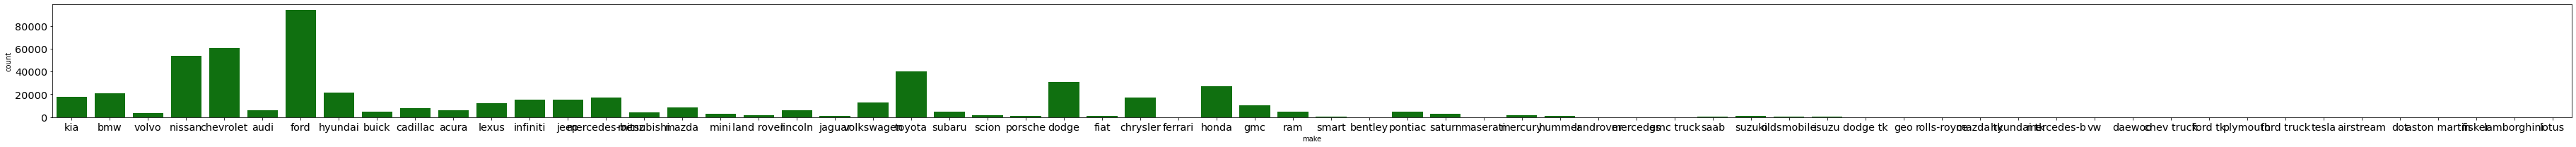

In [ ]:
plt.figure(figsize=(150, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['make'], color='green', orient='v')
plt.tight_layout();

#### model

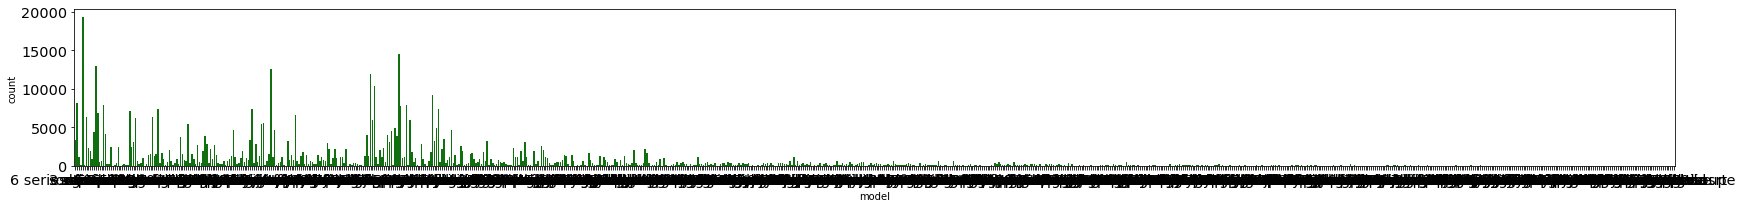

In [ ]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['model'], color='green', orient='v')
plt.tight_layout();

#### trim

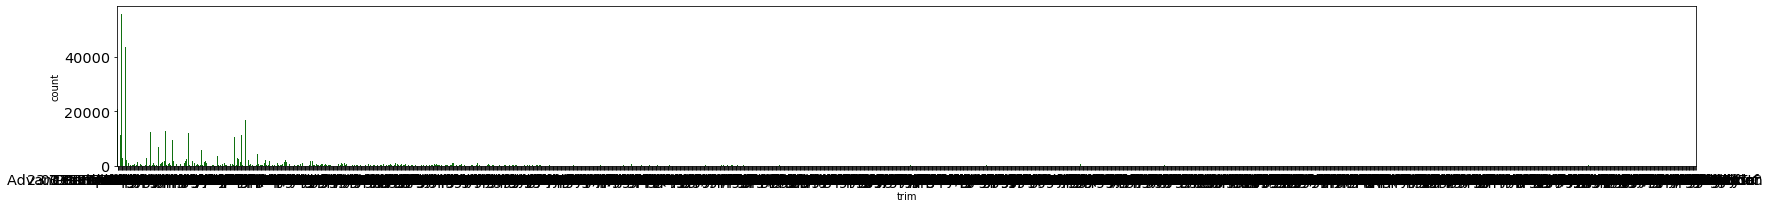

In [ ]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['trim'], color='green', orient='v')
plt.tight_layout();

#### body

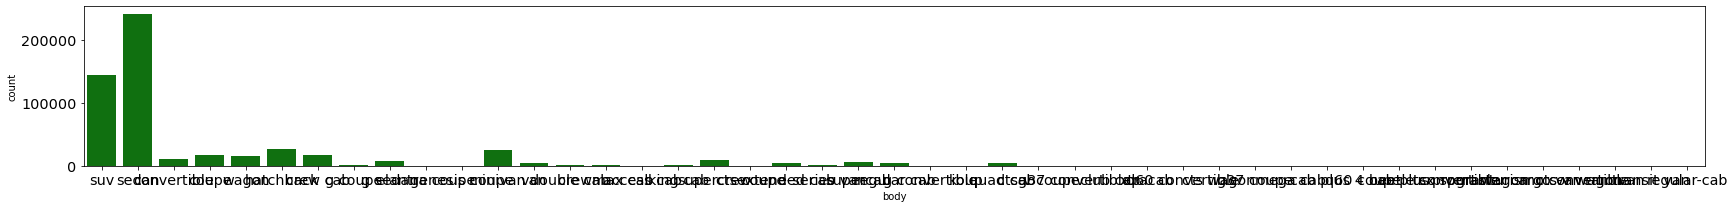

In [ ]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['body'], color='green', orient='v')
plt.tight_layout();

#### transmission

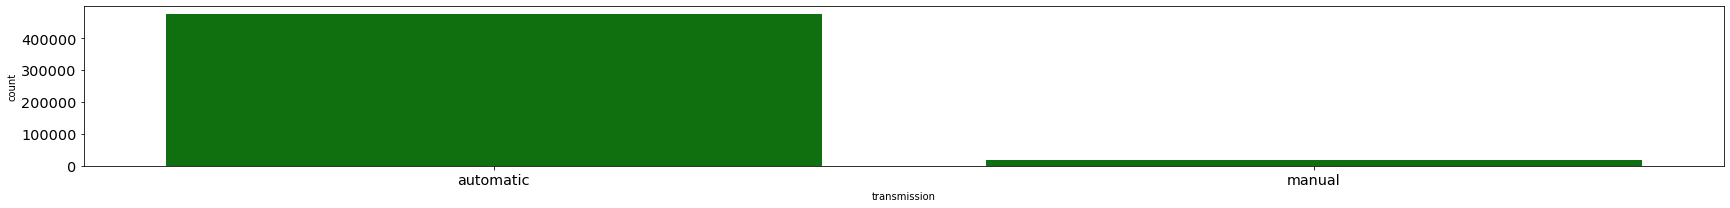

In [ ]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['transmission'], color='green', orient='v')
plt.tight_layout();

#### color

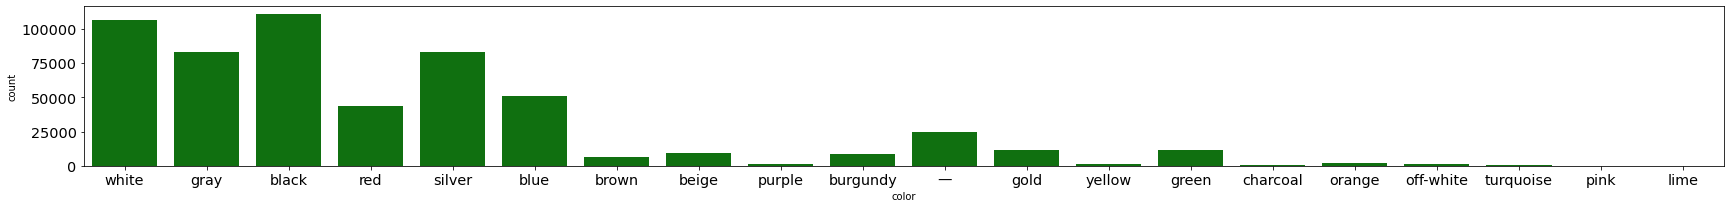

In [ ]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['color'], color='green', orient='v')
plt.tight_layout();

#### interior

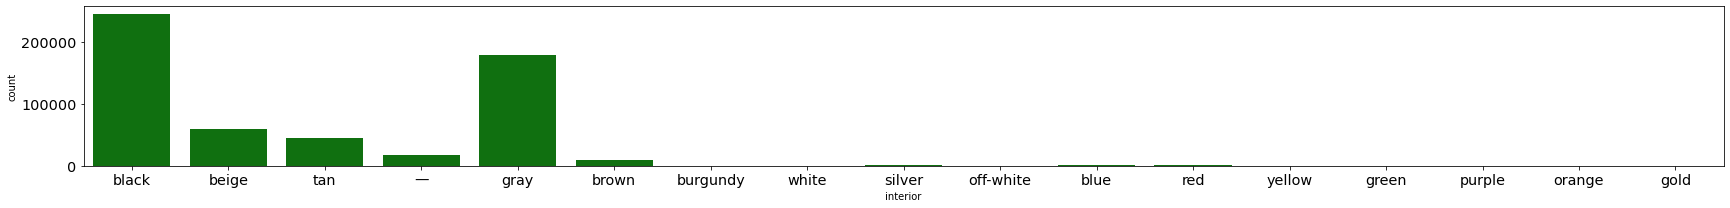

In [ ]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['interior'], color='green', orient='v')
plt.tight_layout();

`vin`, `seller`, `saledate` tidak ditampilkan karena memiliki unique values paling banyak.

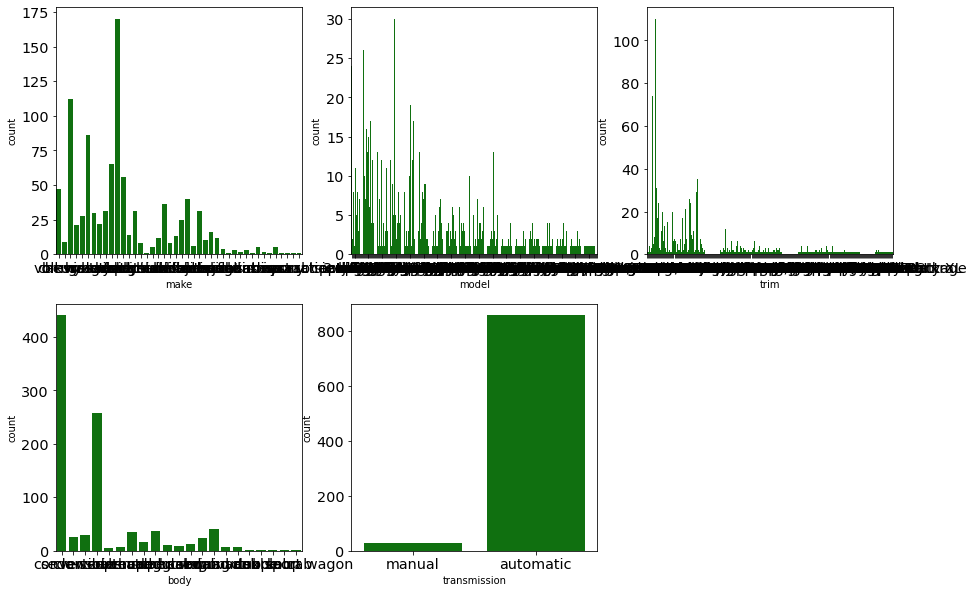

In [ ]:
df_sample = df.sample(1000, random_state = 123)
plt.figure(figsize=(15, 10))
for i in range(0, len(cats_1)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats_1[i]], color = 'green', orient = 'v')

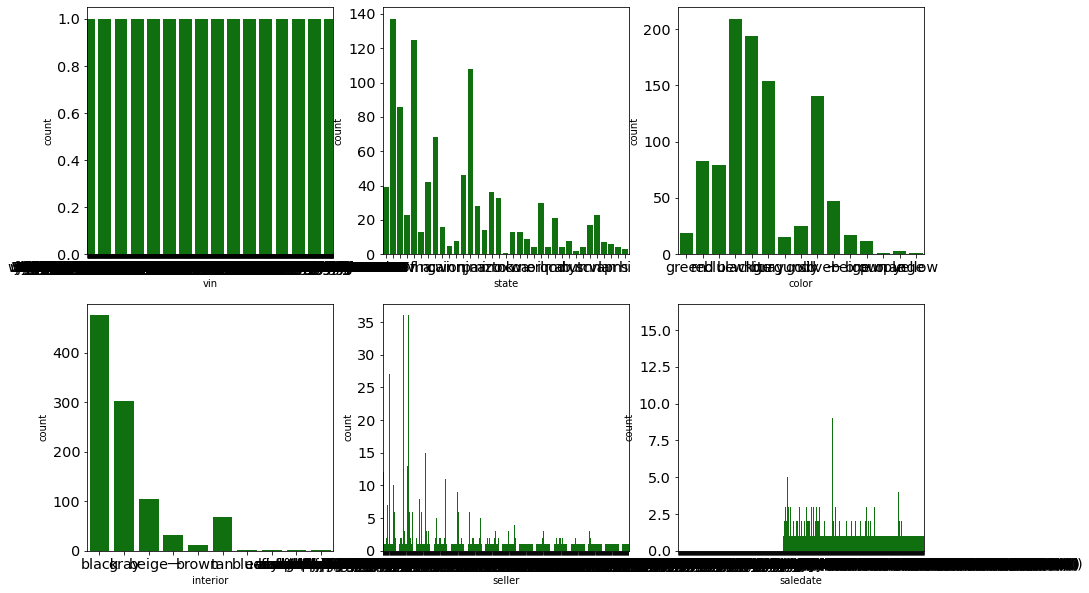

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(0, len(cats_2)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats_2[i]], color = 'green', orient = 'v')

**Pengamatan Countplot**:
1. Kolom `make`, `model`, `trim`, `body`, `vin`, `state`, `color`, `interior`, dan `seller` memiliki kategori yang sangat banyak, sehingga perlu ditinjau kembali kembali kolom yang akan menjadi target dalam pemodelan,
2. Kolom `transmission` didominasi oleh automatic sesuai dengan pengamatan dengan menggunakan df.describe.

## No. 3 Multivariate Analysis

In [ ]:
df.corr()

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.551282,-0.772720,0.596623,0.586488
condition,0.551282,1.000000,-0.538874,0.485050,0.538788
odometer,-0.772720,-0.538874,1.000000,-0.588107,-0.582405
mmr,0.596623,0.485050,-0.588107,1.000000,0.983634
sellingprice,0.586488,0.538788,-0.582405,0.983634,1.000000


### Correlation Heatmap

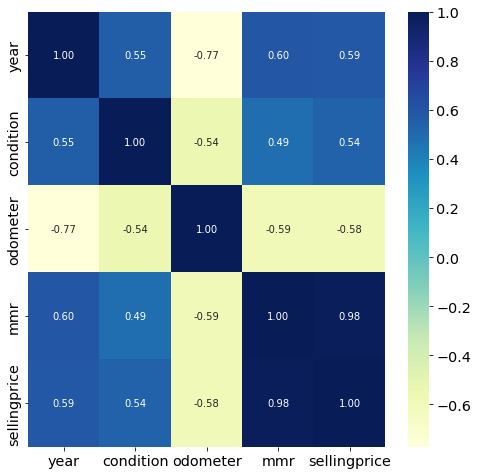

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f');

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target dari analisis ini adalah `sellingprice` dan memiliki korelasi positif sangat kuat dengan `mmr` (strong potential feature),
* Target `sellingprice` juga memiliki korelasi positif cukup tinggi dengan `year` dan `condition`, dan korelasi negatif dengan `odometer` (decent potential feature),
* `year` memiliki korelasi negatif cukup kuat dengan `odometer`. Ada kemungkinan kedua *feature* ini redundan (dapat dipilih salah satunya saja untuk training data).

### Pair Plot

<Figure size 1080x1080 with 0 Axes>

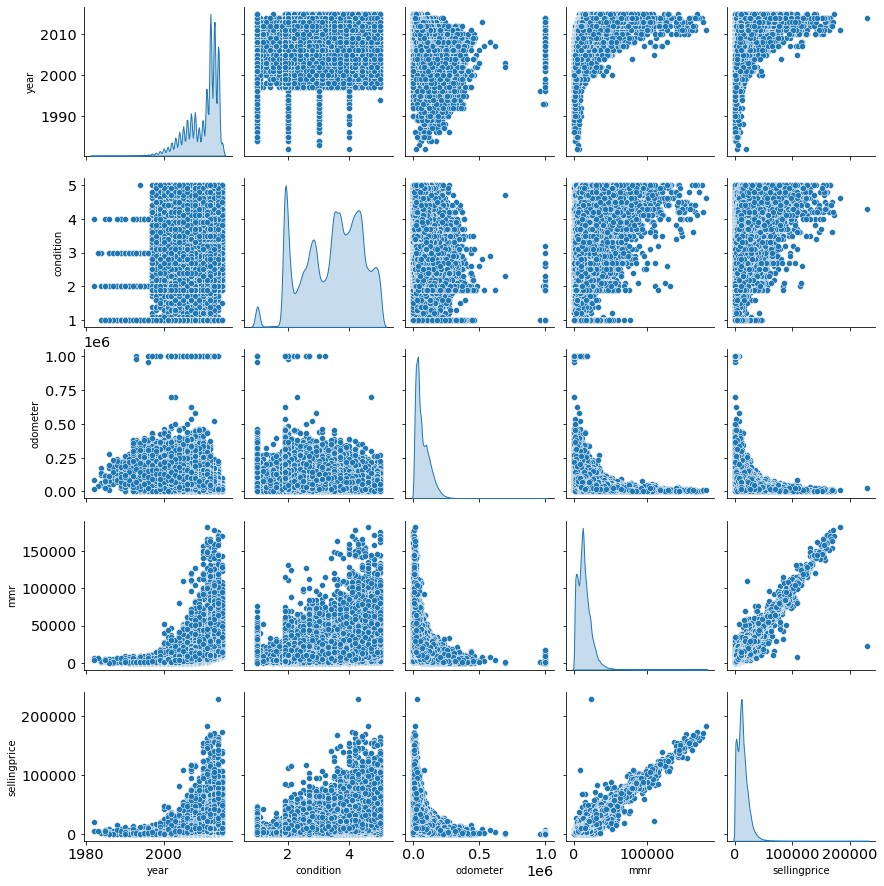

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde');

Dari pair plot di atas, kita juga dapat melilhat hal yang mirip:
* `mmr` jelas memiliki korelasi linear dengan `sellingprice`,
* `year` dan `odometer` jelas memiliki korelasi terbalik yang cukup kuat.

### Category Column vs Target Variable

In [ ]:
cats

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']

#### Top 10 Used Car Sold (Brands)

In [ ]:
df['make'].value_counts().iloc[:10]

ford         93997
chevrolet    60587
nissan       54017
toyota       39966
dodge        30955
honda        27351
hyundai      21836
bmw          20793
kia          18084
chrysler     17485
Name: make, dtype: int64

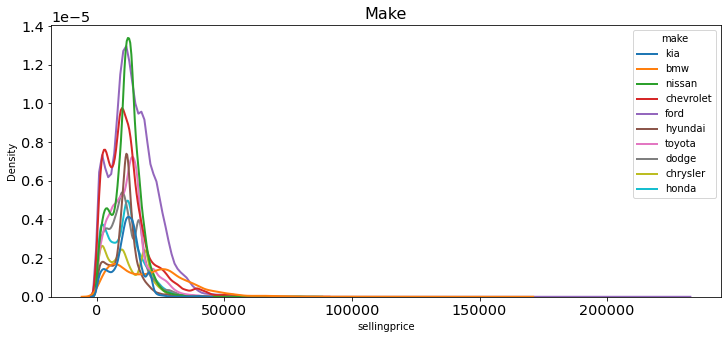

In [ ]:
df['make'] = df['make'].str.lower()
make_top = df[df['make'].isin(['ford', 'chevrolet', 'nissan', 'toyota', 'dodge', 'honda', 'hyundai', 'bmw', 'kia', 'chrysler'])]
sns.kdeplot(x = 'sellingprice', hue = 'make', data = make_top)
plt.title('Make', fontsize = 16);

#### Top 10 Used Car Sold (Model)

In [ ]:
df['model'].value_counts().iloc[:10]

altima           19349
f-150            14479
fusion           12946
camry            12549
escape           11893
focus            10399
accord            9155
3 series          8204
impala            7957
grand caravan     7941
Name: model, dtype: int64

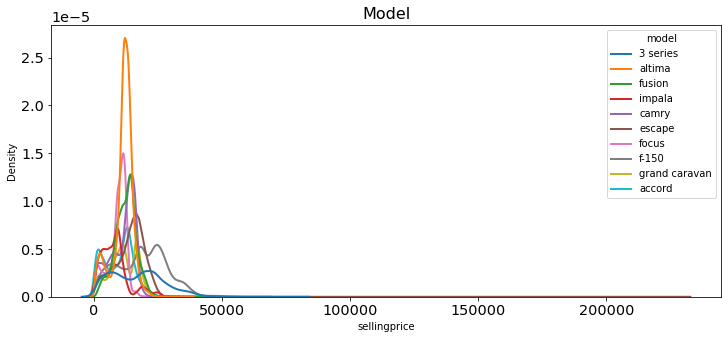

In [ ]:
df['model'] = df['model'].str.lower()
model_top = df[df['model'].isin(['altima', 'f-150', 'fusion', 'camry', 'escape', 'focus', 'accord', '3 series', 'impala', 'grand caravan'])]
sns.kdeplot(x = 'sellingprice', hue = 'model', data = model_top)
plt.title('Model', fontsize = 16);

#### Top 10 Used Car Sold (Trim)

In [ ]:
df['trim'].value_counts().iloc[:10]

Base       55817
SE         43648
LX         20757
Limited    18356
LT         16915
XLT        16741
LS         13427
LE         12903
GLS        12331
S          11883
Name: trim, dtype: int64

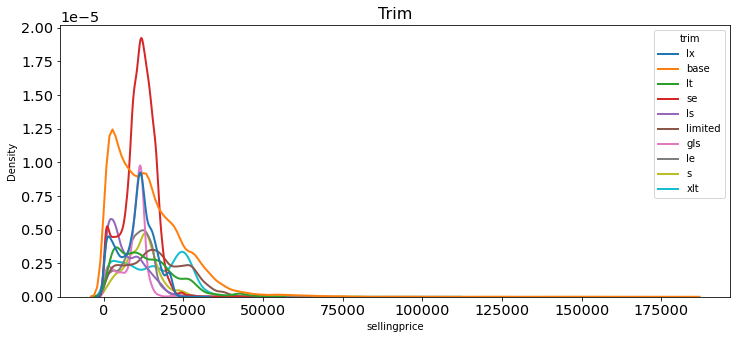

In [ ]:
df['trim'] = df['trim'].str.lower()
trim_top = df[df['trim'].isin(['base', 'se', 'lx', 'limited', 'lt', 'xlt', 'ls', 'le', 'gls', 's'])]
sns.kdeplot(x = 'sellingprice', hue = 'trim', data = trim_top)
plt.title('Trim', fontsize = 16);

#### Top 10 Used Car Sold (Trim)

In [ ]:
df['body'].value_counts().iloc[:10]

sedan          241343
suv            143844
hatchback       26237
minivan         25529
coupe           17752
crew cab        16394
wagon           16129
convertible     10476
supercrew        9033
g sedan          7417
Name: body, dtype: int64

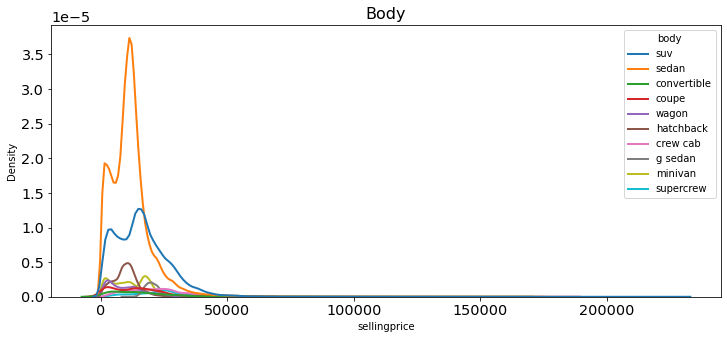

In [ ]:
df['body'] = df['body'].str.lower()
body_top = df[df['body'].isin(['sedan', 'suv', 'hatchback', 'minivan', 'coupe', 'crew cab', 'wagon', 'convertible', 'supercrew', 'g sedan'])]
sns.kdeplot(x = 'sellingprice', hue = 'body', data = body_top)
plt.title('Body', fontsize = 16);

#### Top 10 Used Car Sold (Transmission)

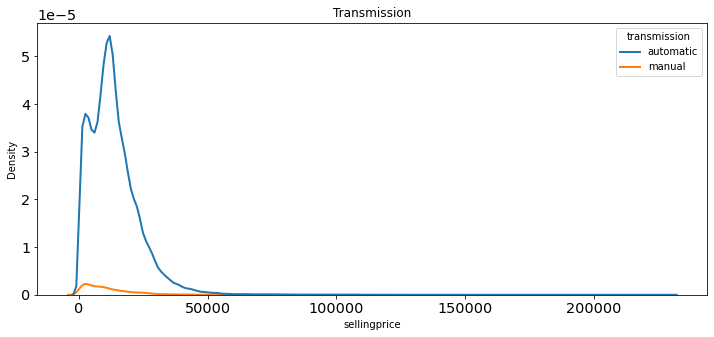

In [ ]:
sns.kdeplot(data=df, x='sellingprice', hue='transmission')
plt.title('Transmission');

In [ ]:
df['state'].value_counts().iloc[:10]

fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
Name: state, dtype: int64

#### Top 10 Used Car Sold (State)

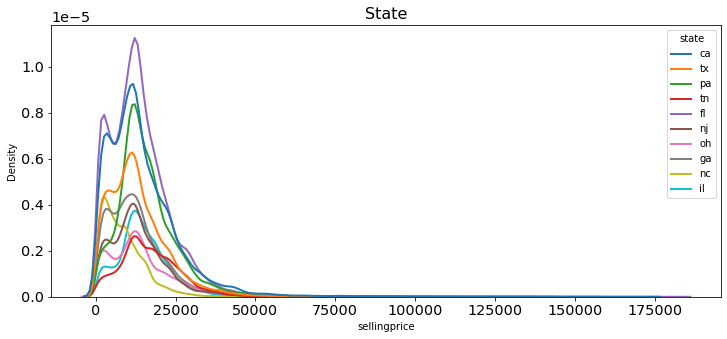

In [ ]:
df['state'] = df['state'].str.lower()
state_top = df[df['state'].isin(['fl', 'ca', 'pa', 'tx', 'ga', 'nj', 'il', 'nc', 'oh', 'tn'])]
sns.kdeplot(x = 'sellingprice', hue = 'state', data = state_top)
plt.title('State', fontsize = 16);

#### Top 10 Used Car Sold (Color)

In [ ]:
df['color'].value_counts().iloc[:10]

black     110970
white     106673
silver     83389
gray       82857
blue       51139
red        43569
—          24685
green      11382
gold       11342
beige       9222
Name: color, dtype: int64

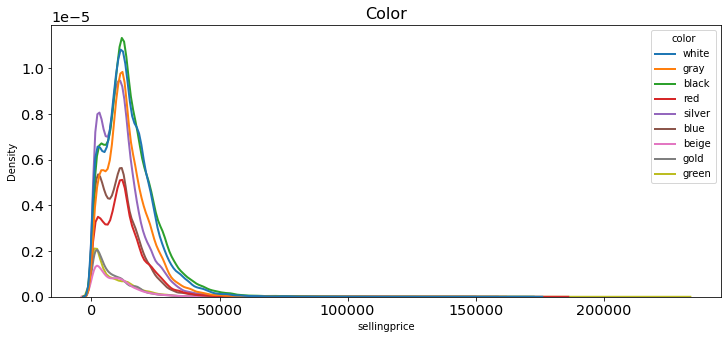

In [ ]:
df['color'] = df['color'].str.lower()
color_top = df[df['color'].isin(['black', 'white', 'silver', 'gray', 'blue', 'red', '-', 'green', 'gold', 'beige'])]
sns.kdeplot(x = 'sellingprice', hue = 'color', data = color_top)
plt.title('Color', fontsize = 16);

#### Top 10 Used Car Sold (Interior)

In [ ]:
df['interior'].value_counts().iloc[:10]

black        244325
gray         178578
beige         59758
tan           44093
—             17076
brown          8640
red            1359
blue           1138
silver         1099
off-white       480
Name: interior, dtype: int64

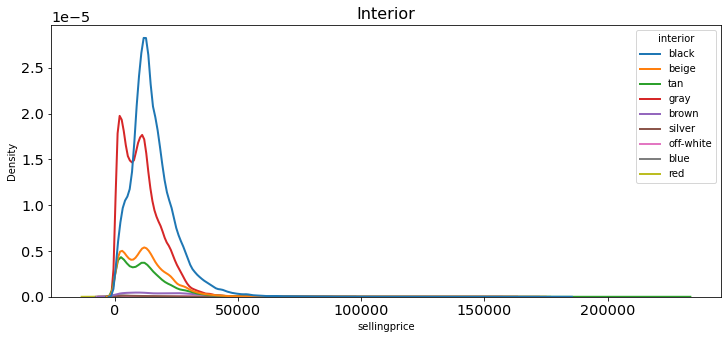

In [ ]:
df['interior'] = df['interior'].str.lower()
interior_top = df[df['interior'].isin(['black', 'gray', 'beige', 'tan', '-', 'brown', 'red', 'blue', 'silver', 'off-white'])]
sns.kdeplot(x = 'sellingprice', hue = 'interior', data = interior_top)
plt.title('Interior', fontsize = 16);

#### Top 10 Used Car Sold (Seller)

In [ ]:
df['seller'].value_counts().iloc[:10]

nissan-infiniti lt                       19693
ford motor credit company,llc            19162
the hertz corporation                    18299
santander consumer                       15285
avis corporation                         12540
nissan infiniti lt                        9962
wells fargo dealer services               8796
tdaf remarketing                          7209
enterprise veh exchange/rental            6853
ge fleet services for itself/servicer     6692
Name: seller, dtype: int64

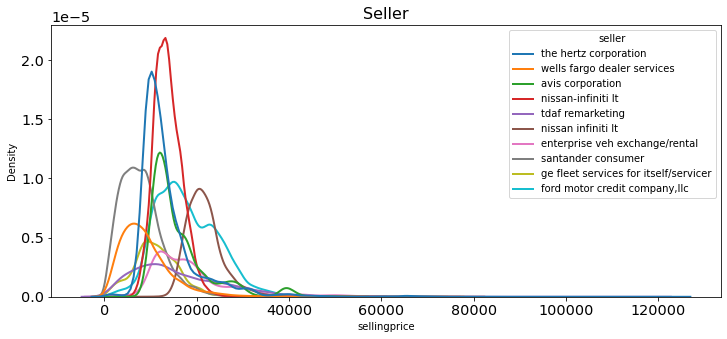

In [ ]:
df['seller'] = df['seller'].str.lower()
seller_top = df[df['seller'].isin(['nissan-infiniti lt', 'ford motor credit company,llc', 'the hertz corporation', 'santander consumer', 'avis corporation' ,'nissan infiniti lt', 'wells fargo dealer services', 'tdaf remarketing', 'enterprise veh exchange/rental', 'ge fleet services for itself/servicer'])]
sns.kdeplot(x = 'sellingprice', hue = 'seller', data = seller_top)
plt.title('Seller', fontsize = 16);

Untuk fiture `model`, `trim`, `vin`, `saledate`, `seller` tidak ditampilkan plotnya dikarenakan kardinalitasnya sangat tinggi.

Pengamatan:
- Semua kolom terkecuali `transmission` memiliki kategori yang sangat banyak, sehingga setiap kolom dikelompokkan kembali berdasarkan jumlah terbanyak (top 10) untuk mempermudah dalam melihat distribusinya,
* Kolom `vin` dan `saledate` tidak perlu dilihat korelasinya kepada `target` dikarenakan secara bisnis vin dan saledate tidak berpengaruh kepada harga sebuah mobil (`sellingprice`),
- Distribusi transmisi automatic tampaknya cenderung memiliki selling price yang lebih tinggi ketimbang transmisi manual (hal ini menunjukkan bahwa `transmission` menjadi fitur yang promising untuk digunakan dalam pemodelan),
* Sepertinya feature `make`, `body`, `interior` memiliki perbedaan jumlah yang signifikan antar kategorinya (perlu ditangani lebih lanjut dengan feature encoding),
* Sepertinya feature `state` dan `color` memiliki distribusi yang terlihat signifikan antara top 5 kategori dengan yang lainnya, namun antar kategori top 5-nya tidak memiliki perbedaan distribusi yang signifikan.

Beberapa hal yang ditemukan dari EDA dataset di atas sebagai berikut:
- Data terlihat valid dan tidak ada kecacatan yang signifikan,
- Beberapa kolom perlu ditinjau ulang di pre-processing (huruf besar/kecil dan missing values),
- Ada beberapa distribusi yang skewed atau bahkan ada distribusi dengan arah yang tidak jelas (`condition`) dan memiliki outlier,
- Beberapa fitur memiliki korelasi yang jelas, sehingga akan dipakai dalam pemodelan
- Kolom yang memiliki jumlah unique values banyak perlu dihandle lebih lanjut pada feature encoding
- Ada feature `year`, `condition`, `odometer` memiliki korelasi yang tinggi satu sama lain sehingga kemungkinan feature tersebut redundan dan perlu ada feature yang didrop
- Dari fitur kategorikal, kolom `transmission` sepertinya berguna untuk menjadi prediktor model.

## No 4. Business Insight

### Price Segmentation

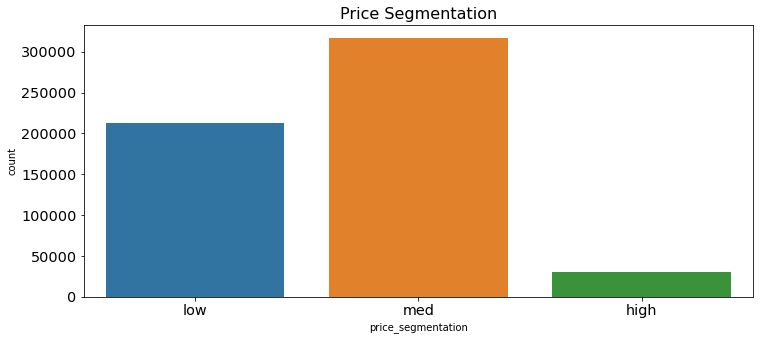

In [ ]:
df['price_segmentation'] = np.where(df['sellingprice']<10000, 'low', np.where(df['sellingprice']>30000, 'high', 'med'))
order = ['low', 'med', 'high']
plt.title('Price Segmentation', fontsize = 16)
sns.countplot(x = df['price_segmentation'], order = order);

Dari countplot berikut bisa didapatkan insight bahwa harga mobil dengan kategori medium memiliki jumlah terbanyak, sedangkan kategori high memiliki kategori yang paling sedikit.

### Transmission

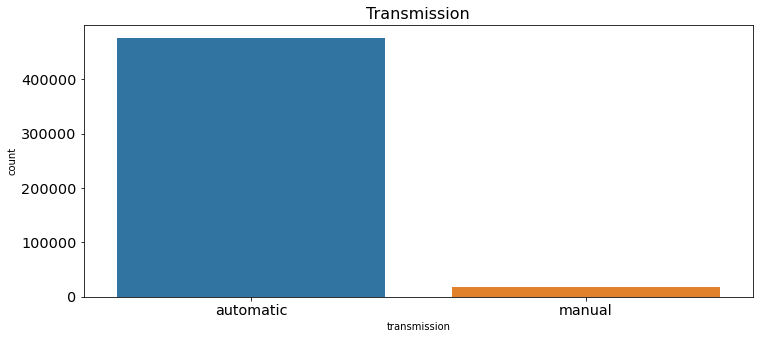

In [ ]:
sns.countplot(x = 'transmission', data = df)
plt.title('Transmission', fontsize = 16);

Dari transmission bisa dilihat bahwa mobil dari dataset tersebut adalah automatic.

# **Preprocessing**

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
df = pd.read_csv('car_prices.csv', error_bad_lines = False, warn_bad_lines = True)
df.head()

/Users/bagusganjar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/bagusganjar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


FileNotFoundError: [Errno 2] No such file or directory: 'car_prices.csv'

## No. 1 Data Cleansing

In [5]:
df.info()

NameError: name 'df' is not defined

Pengamatan\:
1. Data terdiri dari 55811 baris,
2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris),
3. Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai).

In [6]:
df.sample(5)

NameError: name 'df' is not defined

### Drop Kolom `mmr`

In [7]:
df.drop(columns = 'mmr', inplace = True, axis = 1)

Alasan drop kolom `mmr`:
- Kolom mmr memiliki nilai median dan mean yang berbeda sehingga distribusinya skew,
- Pada correlation heatmap, bisa diamati bahwa kolom `mmr` memiliki korelasi kuat positif terhadap target `sellingprice` yaitu 0.98,
- Pada pair plot, bisa diamati bahwa kolom `mmr` memiliki korelasi linear terhadap target `sellingprice`,
- MMR adalah Manheim Market Report, sebuah indikator pada harga grosir untuk menentukan harga mobil. Hal ini menunjukkan mengapa nilai MMR begitu dekat dengan selling price.

References:
https://www.autoauctionmall.com/learning-center/what-does-mmr-mean/

### Drop Kolom `state`

In [8]:
price_segmentation = np.where(df['sellingprice']<10000, 'low', np.where(df['sellingprice']>30000, 'high', 'med'))

In [9]:
df['state'] = df['state'].str.lower()

def state(x):
    if x['state'] == 'fl':
        state = 'fl'
    elif x['state'] == 'ca':
        state = 'ca'
    elif x['state'] == 'pa':
        state = 'pa'
    elif x['state'] == 'tx':
        state = 'tx'
    elif x['state'] == 'ga':
        state = 'ga'
    elif x['state'] == 'nj':
        state = 'nj'
    elif x['state'] == 'il':
        state = 'il'
    elif x['state'] == 'nc':
        state = 'nc'
    elif x['state'] == 'oh':
        state = 'oh'
    elif x['state'] == 'tn':
        state = 'tn'
    else:
        state = 'others'
    return state

df['state'] = df.apply(lambda x: state(x), axis=1)

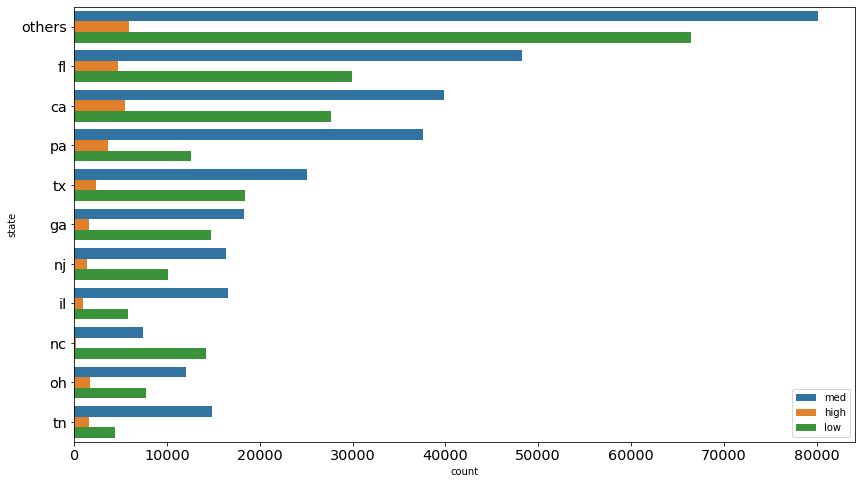

In [10]:
plt.figure(figsize=(14,8))
sns.countplot(y='state', hue=price_segmentation, data=df, order=pd.value_counts(df['state']).index);

In [11]:
df.drop(columns = 'state', inplace = True, axis = 1)

Alasan drop kolom `state`: 
- Persebaran rasio segmentasi harga (low/med/high) dari setiap state memiliki nilai yang sama,
- Setiap stage didominasi oleh medium, sedangkan segmentasi high menjadi yang paling sedikit. Oleh karena itu, tidak terlihat ada perbedaan yang mencolok.

### Drop Kolom `vin`

In [12]:
df.drop(columns = 'vin', inplace = True, axis = 1)

Alasan drop kolom `vin`: 
- `vin` merupakan kode pengenal yang biasanya akan berguna pada spesifik automobil saja (tidak berlaku ke semua mobil),
- secara bisnis `vin` atau nomor identitas kendaraan tidak memiliki pengaruh terhadap target/label `sellingprice`.

References: https://www.autocheck.com/vehiclehistory/vin-basics

### Drop Kolom `interior`

In [13]:
df.drop(columns = 'interior', inplace = True, axis = 1)

Alasan drop kolom `interior`: kolom `interior` memiliki kesamaan nilai dengan `color` sehingga diputuskan untuk drop salah satu nya. Jadi kami memilih `interior` karena berdasarkan preferensi warna body diluar dari mmobil lebih berpengaruh dibanding interior nya.

### Drop Kolom `seller`

In [14]:
df.drop(columns = 'seller', inplace = True, axis = 1)

Alasan drop kolom `seller`: Menurut kami, perusahaan Car-a-thon tidak melihat seller, karena kami tetap akan melakukan filtering pada kendaraan berdasarkan kondisi, odometer, dll (fair value). Sehingga, siapapun sellernya bisa melakukan penjualan (tidak ada perbedaan). Kolom `seller` memiliki jumlah unique values yang sangat banyak (kardinalitas tinggi), sehingga akan menyulitkan ketika melakukan feature encoding.

## Statistical Summary

In [15]:
nums_update = ['year', 'condition', 'odometer', 'sellingprice']
cats_update = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'saledate']

In [16]:
df[nums_update].describe()

,year,condition,odometer,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13611.262461
std,3.966812,0.949439,53397.752933,9749.656919
min,1982.000000,1.000000,1.000000,1.000000
25%,2007.000000,2.700000,28374.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18200.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [17]:
df[cats_update].describe()

,make,model,trim,body,transmission,color,saledate
count,548510,548412,548160,545616,493458,558062,558811
unique,96,973,1975,86,2,20,3745
top,Ford,Altima,Base,Sedan,automatic,black,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,110970,5334


## A. Handle Missing Values

In [18]:
# jumlah missing values di setiap kolom
df.isna().sum().sort_values(ascending = False)

transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
odometer           94
year                0
sellingprice        0
saledate            0
dtype: int64

In [19]:
# persentase missing values di setiap kolom
missing_values = df.isna().sum().sort_values(ascending = False)/len(df)*100
missing_values

transmission    11.695010
body             2.361263
condition        2.110553
trim             1.906011
model            1.860915
make             1.843378
color            0.134035
odometer         0.016821
year             0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

In [20]:
missing_values[['body', 'condition', 'trim', 'model', 'make', 'color', 'odometer']].sum()

10.232976802532521

- `transmission`: impute dengan nilai modus (automatic),
- `body`, `trim`, `condition`, `color`, `odometer`, `make`, dan `model` : drop saja (karena secara total persentasenya hanya 10%),
- `year`, `saledate`, dan `sellingprice`: tidak memiliki missing values sehingga tidak perlu dihandle.

### Dataframe Impute (`transmission`) dan Drop (`body`, `condition`, `make`, `color`, `odometer`)

In [21]:
# impute transmission dengan modus
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])

In [22]:
# drop `body`, `model`, `trim`, `condition`, `color`, `odometer`, dan `make`
df = df.dropna()

In [23]:
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
condition       0
odometer        0
color           0
sellingprice    0
saledate        0
dtype: int64

### Dataframe Impute (`transmission`, `body`, `condition`, `make`, `color`, dan `odometer`)

In [24]:
# impute transmission dengan modus
# df_2['transmission'] = df_2['transmission'].fillna(df_2['transmission'].mode()[0])

In [25]:
# impute body dengan modus
# df_2['body'] = df_2['body'].fillna(df_2['body'].mode()[0])

In [26]:
# impute condition dengan median
# df_2['condition'] = df_2['condition'].fillna(df_2['condition'].median())

In [27]:
# impute make dengan modus
# df_2['make'] = df_2['make'].fillna(df_2['make'].mode()[0])

In [28]:
# impute color dengan modus
# df_2['color'] = df_2['color'].fillna(df_2['color'].mode()[0])

In [29]:
# impute odometer dengan median
# df_2['odometer'] = df_2['odometer'].fillna(df_2['odometer'].median())

In [30]:
# df_2.head()

In [31]:
# df_2.isna().sum()

## B. Handle Duplicated Data

In [32]:
df.duplicated().sum()

0

Tidak ada data yang duplikat pada dataset.

In [33]:
print(cats_update)
print(nums_update)

['make', 'model', 'trim', 'body', 'transmission', 'color', 'saledate']
['year', 'condition', 'odometer', 'sellingprice']


#### **Kolom `make`**

In [34]:
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Buick', 'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Geo', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [35]:
len(df['make'].unique())

53

In [36]:
df['make'] = df['make'].str.lower()
len(df['make'].unique())

53

In [37]:
df['make'].value_counts().iloc[:9]

ford         91908
chevrolet    58817
nissan       53085
toyota       38991
dodge        30102
honda        26373
hyundai      21474
bmw          20140
kia          17870
Name: make, dtype: int64

In [38]:
# Ubah nama make menjadi others jika tidak termasuk 10 besar penjualan

def top_10_make(x):
  if x['make'] == 'ford':
    top_10_make = 'ford'
  elif x['make'] == 'chevrolet':
    top_10_make = 'chevrolet'
  elif x['make'] == 'nissan':
    top_10_make = 'nissan'
  elif x['make'] == 'toyota':
    top_10_make = 'toyota'
  elif x['make'] == 'dodge':
    top_10_make = 'dodge'
  elif x['make'] == 'honda':
    top_10_make = 'honda'
  elif x['make'] == 'hyundai':
    top_10_make = 'hyundai'
  elif x['make'] == 'bmw':
    top_10_make = 'bmw'
  elif x['make'] == 'kia':
    top_10_make = 'kia'
  else:
    top_10_make = 'others'
  return top_10_make

df['top_10_make'] = df.apply(lambda x: top_10_make(x), axis=1)

#### **Kolom `model`**

In [39]:
len(df['model'].unique())

772

In [40]:
df['model'] = df['model'].str.lower()
len(df['model'].unique())

768

In [41]:
df['model'].value_counts(ascending = False).iloc[:9]

altima           19159
f-150            14164
fusion           12836
camry            12326
escape           11714
focus            10230
accord            8865
3 series          8019
grand caravan     7840
Name: model, dtype: int64

In [42]:
# Ubah nama model menjadi others jika tidak termasuk 10 besar

def top_10_model(x):
  if x['model'] == 'altima':
    top_10_model = 'altima'
  elif x['model'] == 'f-150':
    top_10_model = 'f-150'
  elif x['model'] == 'fusion':
    top_10_model = 'fusion'
  elif x['model'] == 'camry':
    top_10_model = 'camry'
  elif x['model'] == 'escape':
    top_10_model = 'escape'
  elif x['model'] == 'focus':
    top_10_model = 'focus'
  elif x['model'] == 'accord':
    top_10_model = 'accord'
  elif x['model'] == '3 series':
    top_10_model = '3 series'
  elif x['model'] == 'grand caravan':
    top_10_model = 'grand caravan'
  else:
    top_10_model = 'others'
  return top_10_model
  
df['top_10_model'] = df.apply(lambda x: top_10_model(x), axis=1)

#### Kolom `trim`

In [43]:
len(df['trim'].unique())

1523

In [44]:
df['trim'] = df['trim'].str.lower()
len(df['trim'].unique())

1504

In [45]:
df['trim'].value_counts().iloc[:9]

base       54098
se         43024
lx         20367
limited    17969
lt         16640
xlt        16357
ls         13052
le         12692
gls        12175
Name: trim, dtype: int64

In [46]:
# Ubah nama trim menjadi others jika tidak termasuk 10 besar

def top_10_trim(x):
  if x['trim'] == 'base':
    top_10_trim = 'base'
  elif x['trim'] == 'se':
    top_10_trim = 'se'
  elif x['trim'] == 'lx':
    top_10_trim = 'lx'
  elif x['trim'] == 'limited':
    top_10_trim = 'limited'
  elif x['trim'] == 'lt':
    top_10_trim = 'lt'
  elif x['trim'] == 'xlt':
    top_10_trim = 'xlt'
  elif x['trim'] == 'ls':
    top_10_trim = 'ls'
  elif x['trim'] == 'le':
    top_10_trim = 'le'
  elif x['trim'] == 'gls':
    top_10_trim = 'gls'
  else:
    top_10_trim = 'others'
  return top_10_trim

df['top_10_trim'] = df.apply(lambda x: top_10_trim(x), axis=1)

#### **Kolom `body`**

In [47]:
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'GranTurismo Convertible',
       'CTS-V Wagon', 'Ram Van', 'convertible', 'minivan', 'suv',
       'Transit Van', 'van', 'regular-cab', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'coupe',
       'crew cab', 'wagon', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crewmax c

In [48]:
len(df['body'].unique())

86

In [49]:
df['body'] = df['body'].str.lower()
len(df['body'].unique())

45

In [50]:
body_list=[]

for index,kolom in df.iterrows():
  body=kolom['body']
  if body.endswith('cab')==True:
    bodies= 'cab'
  elif body.startswith('cab')==True:
    bodies= 'cab'
  elif body.endswith('coupe')==True:
    bodies= 'coupe'
  elif body.endswith('koup')==True:
    bodies= 'coupe'
  elif body.endswith('van')==True:
    bodies= 'van'
  elif body.endswith('wagon')==True:
    bodies= 'wagon'
  elif body.endswith('convertible')==True:
    bodies= 'convertible'
  elif body.endswith('suv')==True:
    bodies= 'suv'
  elif body.endswith('sedan')==True:
    bodies= 'sedan'
  elif body.endswith('hatchback')==True:
    bodies= 'hatchback'
  else:
    bodies='others'
  body_list.append(bodies)

df['body']=body_list

In [51]:
df['body'].value_counts().iloc[:10]

sedan          243857
suv            140531
cab             37399
van             31242
hatchback       25737
coupe           19655
wagon           15729
convertible     10636
others           8874
Name: body, dtype: int64

#### **Kolom `color`**

In [52]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [53]:
len(df['color'].unique())

20

In [54]:
df['color'].value_counts().iloc[:10]

black     106600
white     101837
gray       80004
silver     79518
blue       48533
red        41635
—          24371
gold       10471
green      10361
beige       8591
Name: color, dtype: int64

In [55]:
# Ubah nama color menjadi others jika tidak termasuk 10 besar

def top_10_color(x):
  if x['color'] == 'black':
    top_10_color = 'black'
  elif x['color'] == 'white':
    top_10_color = 'white'
  elif x['color'] == 'gray':
    top_10_color = 'gray'
  elif x['color'] == 'silver':
    top_10_color = 'silver'
  elif x['color'] == 'blue':
    top_10_color = 'blue'
  elif x['color'] == 'red':
    top_10_color = 'red'
  elif x['color'] == 'gold':
    top_10_color = 'gold'
  elif x['color'] == 'green':
    top_10_color = 'green'
  elif x['color'] == 'burgundy':
    top_10_color = 'burgundy'
  else:
    top_10_color = 'others'
  return top_10_color

df['top_10_color'] = df.apply(lambda x: top_10_color(x), axis=1)

#### Kolom `sellingprice`

In [56]:
df.loc[df['sellingprice']==1]

,year,make,model,trim,body,transmission,condition,odometer,color,sellingprice,saledate,top_10_make,top_10_model,top_10_trim,top_10_color
48453,2003,mercedes-benz,e-class,e500,sedan,automatic,2.1,1.0,black,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST),others,others,others,black
293223,2014,ford,e-series van,e-250,van,automatic,4.1,31886.0,white,1,Thu Feb 12 2015 03:00:00 GMT-0800 (PST),ford,others,others,white
348252,1995,isuzu,rodeo,ls,suv,automatic,1.0,254132.0,red,1,Wed Mar 04 2015 01:05:00 GMT-0800 (PST),others,others,ls,red


In [57]:
# Terdapat 3 data yang memiliki nilai sellingprice weird, maka bisa di drop
df = df[ ~(df['sellingprice'] == 1) ]

In [58]:
df.describe()

,year,condition,odometer,sellingprice
count,533657.000000,533657.000000,533657.000000,533657.000000
mean,2010.231180,3.435999,66253.314554,13860.040564
std,3.828378,0.945510,52092.622015,9673.454348
min,1990.000000,1.000000,1.000000,100.000000
25%,2008.000000,2.700000,27747.000000,7300.000000
50%,2012.000000,3.600000,50145.000000,12400.000000
75%,2013.000000,4.200000,95813.000000,18400.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [59]:
df.sort_values(by='sellingprice')

,year,make,model,trim,body,transmission,condition,odometer,color,sellingprice,saledate,top_10_make,top_10_model,top_10_trim,top_10_color
502064,2002,ford,taurus,ses,sedan,automatic,1.9,132230.0,silver,100,Fri Jun 05 2015 02:00:00 GMT-0700 (PDT),ford,others,others,silver
406428,2005,hyundai,elantra,gls,sedan,automatic,1.0,999999.0,white,100,Thu Apr 02 2015 05:02:00 GMT-0700 (PDT),hyundai,others,gls,white
196184,2004,pontiac,montana,base,van,automatic,2.0,106495.0,silver,100,Wed Jan 28 2015 06:30:00 GMT-0800 (PST),others,others,base,silver
466132,2006,buick,rendezvous,cx,suv,automatic,1.0,256040.0,silver,100,Thu May 28 2015 05:01:00 GMT-0700 (PDT),others,others,others,silver
421784,2002,dodge,durango,slt,suv,automatic,1.9,145161.0,silver,100,Thu May 14 2015 03:00:00 GMT-0700 (PDT),dodge,others,others,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125095,2012,rolls-royce,ghost,base,sedan,automatic,4.5,14316.0,black,169500,Wed Jan 14 2015 01:40:00 GMT-0800 (PST),others,others,base,black
545500,2013,rolls-royce,ghost,base,sedan,automatic,4.2,7852.0,white,171500,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT),others,others,base,white
446941,2015,mercedes-benz,s-class,s65 amg,sedan,automatic,4.1,5277.0,white,173000,Thu May 21 2015 05:00:00 GMT-0700 (PDT),others,others,others,white
548146,2011,ferrari,458 italia,base,coupe,automatic,4.6,12116.0,red,183000,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT),others,others,base,red


## C. Handle Outliers

### Menggunakan Z-Score

In [60]:
# from scipy import stats

In [61]:
# print(f'Jumlah baris sebelum memfilter outlier: {len(df_1)}')

# filtered_entries = np.array([True] * len(df_1))

# for col in ['sellingprice', 'odometer']:
    # zscore = abs(stats.zscore(df_1[col])) # hitung absolute z-scorenya
    # filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
# df_1_zscore = df_1[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

# print(f'Jumlah baris setelah memfilter outlier: {len(df_1_zscore)}')

In [62]:
# sns.boxplot(x=df_1_zscore['sellingprice']);

In [63]:
# sns.boxplot(x=df_1_zscore['odometer']);

### Menggunakan IQR

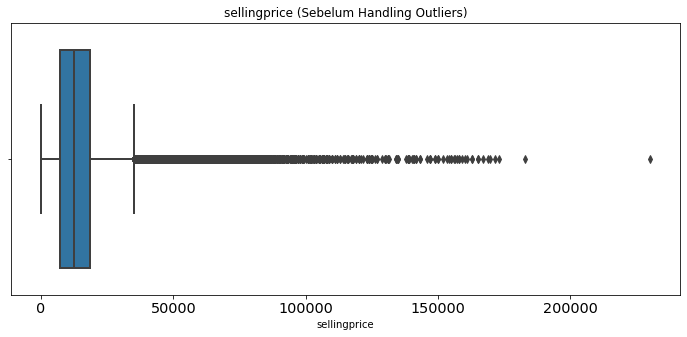

In [64]:
sns.boxplot(x=df['sellingprice'])
plt.title('sellingprice (Sebelum Handling Outliers)');

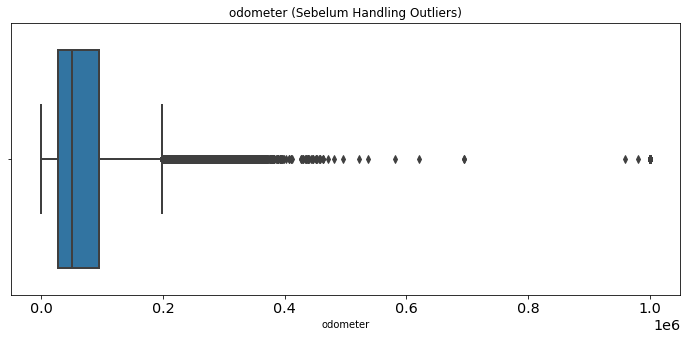

In [65]:
sns.boxplot(x=df['odometer'])
plt.title('odometer (Sebelum Handling Outliers)');

In [66]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['odometer', 'sellingprice']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 533657
Jumlah baris setelah memfilter outlier: 506993


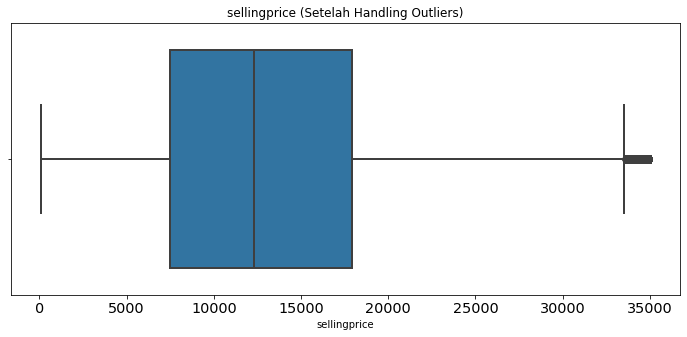

In [67]:
sns.boxplot(x=df['sellingprice'])
plt.title('sellingprice (Setelah Handling Outliers)');

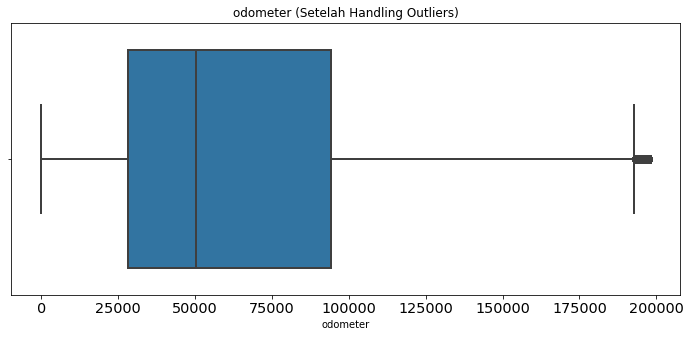

In [68]:
sns.boxplot(x=df['odometer'])
plt.title('odometer (Setelah Handling Outliers)');

## D. Feature Transformation

In [69]:
df.describe()

,year,condition,odometer,sellingprice
count,506993.000000,506993.000000,506993.000000,506993.000000
mean,2010.299556,3.435053,63887.029415,13120.613036
std,3.693058,0.932121,45295.090504,7635.078041
min,1990.000000,1.000000,1.000000,100.000000
25%,2008.000000,2.700000,28326.000000,7500.000000
50%,2012.000000,3.600000,50484.000000,12300.000000
75%,2013.000000,4.200000,94104.000000,17900.000000
max,2015.000000,5.000000,197911.000000,35000.000000


In [70]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# year kita re-scale ke [0,1]
df['year_norm'] = MinMaxScaler().fit_transform(df['year'].values.reshape(len(df), 1))
df['odometer_norm'] = MinMaxScaler().fit_transform(df['odometer'].values.reshape(len(df), 1))

# sellingprice dan condition menggunakan standarisasi (distribusinya sudah mendekati normal)
df['sellingprice_std'] = StandardScaler().fit_transform(df['sellingprice'].values.reshape(len(df), 1))
df['condition_std'] = StandardScaler().fit_transform(df['condition'].values.reshape(len(df), 1))

In [71]:
df.describe()

,year,condition,odometer,sellingprice,year_norm,odometer_norm,sellingprice_std,condition_std
count,506993.000000,506993.000000,506993.000000,506993.000000,506993.000000,506993.000000,5.069930e+05,5.069930e+05
mean,2010.299556,3.435053,63887.029415,13120.613036,0.811982,0.322803,2.283284e-15,4.855688e-14
std,3.693058,0.932121,45295.090504,7635.078041,0.147722,0.228867,1.000001e+00,1.000001e+00
min,1990.000000,1.000000,1.000000,100.000000,0.000000,0.000000,-1.705369e+00,-2.612380e+00
25%,2008.000000,2.700000,28326.000000,7500.000000,0.720000,0.143121,-7.361573e-01,-7.885812e-01
50%,2012.000000,3.600000,50484.000000,12300.000000,0.880000,0.255081,-1.074794e-01,1.769591e-01
75%,2013.000000,4.200000,94104.000000,17900.000000,0.920000,0.475484,6.259781e-01,8.206527e-01
max,2015.000000,5.000000,197911.000000,35000.000000,1.000000,1.000000,2.865643e+00,1.678911e+00


## E. Feature Encoding

In [72]:
cats_update

['make', 'model', 'trim', 'body', 'transmission', 'color', 'saledate']

In [73]:
for col in cats_update:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column make
ford             88313
chevrolet        55454
nissan           52380
toyota           37149
dodge            29412
honda            25059
hyundai          21260
kia              17745
bmw              16830
chrysler         16719
infiniti         14508
mercedes-benz    14445
jeep             14408
volkswagen       12049
lexus            10536
gmc               9439
mazda             8062
cadillac          6668
acura             5390
lincoln           5350
audi              4875
subaru            4861
buick             4824
pontiac           4066
mitsubishi        3926
ram               3914
volvo             3531
mini              3165
saturn            2552
mercury           1812
scion             1626
jaguar            1093
suzuki            1014
land rover         974
fiat               857
hummer             764
porsche            570
saab               445
smart              389
oldsmobile         301
isuzu              171
maserati            56
plymou

Strategi encoding:
- `transmission`, `make`, `model`, `trim`, `body`, `color`: label encoding

### Mapping `transmission`

In [74]:
mapping_transmission = {
    'manual' : 0,
    'automatic' : 1
}
df['transmission_label'] = df['transmission'].map(mapping_transmission)

### Mapping `top_10_make`

In [75]:
df['top_10_make'].value_counts(ascending = False)

others       163391
ford          88313
chevrolet     55454
nissan        52380
toyota        37149
dodge         29412
honda         25059
hyundai       21260
kia           17745
bmw           16830
Name: top_10_make, dtype: int64

In [76]:
mapping_make = {
    'bmw': 0,
    'kia': 1,
    'hyundai': 2,
    'honda': 3,
    'dodge': 4,
    'toyota': 5,
    'nissan': 6,
    'chevrolet': 7,
    'ford': 8,
    'others': 9
}
df['make_label'] = df['top_10_make'].map(mapping_make)

### Mapping `body`

In [77]:
df['body'].value_counts(ascending = False)

sedan          236173
suv            130887
cab             33592
van             30130
hatchback       25402
coupe           17855
wagon           15440
convertible      9435
others           8079
Name: body, dtype: int64

In [78]:
mapping_body = {
    'others': 0,
    'convertible': 1,
    'wagon': 2,
    'coupe': 3,
    'hatchback': 4,
    'van': 5,
    'cab': 6,
    'suv': 7,
    'sedan': 8
}
df['body_label'] = df['body'].map(mapping_body)

### Mapping `top_10_color`

In [79]:
df['top_10_color'].value_counts(ascending = False)

black       99872
white       95513
gray        76847
silver      76619
blue        46756
others      43751
red         40061
gold         9841
green        9566
burgundy     8167
Name: top_10_color, dtype: int64

In [80]:
mapping_color = {
    'burgundy': 0,
    'green': 1,
    'gold': 2,
    'red': 3,
    'others': 4,
    'blue': 5,
    'silver': 6,
    'gray': 7,
    'white': 8,
    'black': 9
}

df['color_label']  = df['top_10_color'].map(mapping_color)

### Mapping `top_10_model`

In [81]:
df['top_10_model'].value_counts(ascending = False)

others           404927
altima            18973
f-150             13094
fusion            12813
camry             11852
escape            11624
focus             10181
accord             8258
grand caravan      7725
3 series           7546
Name: top_10_model, dtype: int64

In [82]:
mapping_model = {
    '3 series': 0,
    'grand caravan': 1,
    'accord': 2,
    'focus': 3,
    'escape': 4,
    'camry': 5,
    'fusion': 6,
    'f-150': 7,
    'altima': 8,
    'others': 9
}
df['model_label'] = df['top_10_model'].map(mapping_model)

### Mapping `top_10_trim`

In [83]:
df['top_10_trim'].value_counts(ascending = False)

others     308515
base        50188
se          42570
lx          19885
limited     17273
lt          16009
xlt         15700
ls          12470
le          12306
gls         12077
Name: top_10_trim, dtype: int64

In [84]:
mapping_trim = {
    'gls': 0,
    'le': 1,
    'ls': 2,
    'xlt': 3,
    'lt': 4,
    'limited': 5,
    'lx': 6,
    'se': 7,
    'base': 8,
    'others': 9
}

df['trim_label'] = df['top_10_trim'].map(mapping_trim)

In [85]:
df.head(2)

,year,make,model,trim,body,transmission,condition,odometer,color,sellingprice,...,year_norm,odometer_norm,sellingprice_std,condition_std,transmission_label,make_label,body_label,color_label,model_label,trim_label
0,2015,kia,sorento,lx,suv,automatic,5.0,16639.0,white,21500,...,1.0,0.084069,1.097487,1.678911,1,1,7,8,9,6
1,2015,kia,sorento,lx,suv,automatic,5.0,9393.0,white,21500,...,1.0,0.047456,1.097487,1.678911,1,1,7,8,9,6


In [86]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'sellingprice', 'saledate', 'top_10_make',
       'top_10_model', 'top_10_trim', 'top_10_color', 'year_norm',
       'odometer_norm', 'sellingprice_std', 'condition_std',
       'transmission_label', 'make_label', 'body_label', 'color_label',
       'model_label', 'trim_label'],
      dtype='object')

## F. Handle Class Imbalance

Tidak perlu handle class imbalance karena dataset kami memiliki target `sellingprice` berupa regresi. Dalam penentuan harga mobil maka data merupakan continuous variables sehingga tidak akan imbalance.

## No. 2 Feature Engineering

## A. Feature Selection

- Kolom `mmr`, `state`, `vin`, `interior`, dan `seller` dilakukan drop.

## B. Feature Extraction

In [87]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'sellingprice', 'saledate', 'top_10_make',
       'top_10_model', 'top_10_trim', 'top_10_color', 'year_norm',
       'odometer_norm', 'sellingprice_std', 'condition_std',
       'transmission_label', 'make_label', 'body_label', 'color_label',
       'model_label', 'trim_label'],
      dtype='object')

- Kolom feature extraction antara lain `top_10_make`, `top_10_model`, `top_10_trim`, `year_norm`, `odometer_norm`, `sellingprice_std`, `condition_std`, `transmission_label`, `make_label`, `body_label`, `top_10_color`, `color_label`, `model_label`, `trim_label`.

## C. Feature Tambahan

Kolom feature tambahan yang bisa menjadi feature antara lain:
- Fuel
- Accident History
- Dealership's Reputation
- Vehicle Tax
- Car Assurance

Reference: https://www.autoremarketing.com/trends/features-info-used-car-buyers-want-most

# **Supervised Learning**

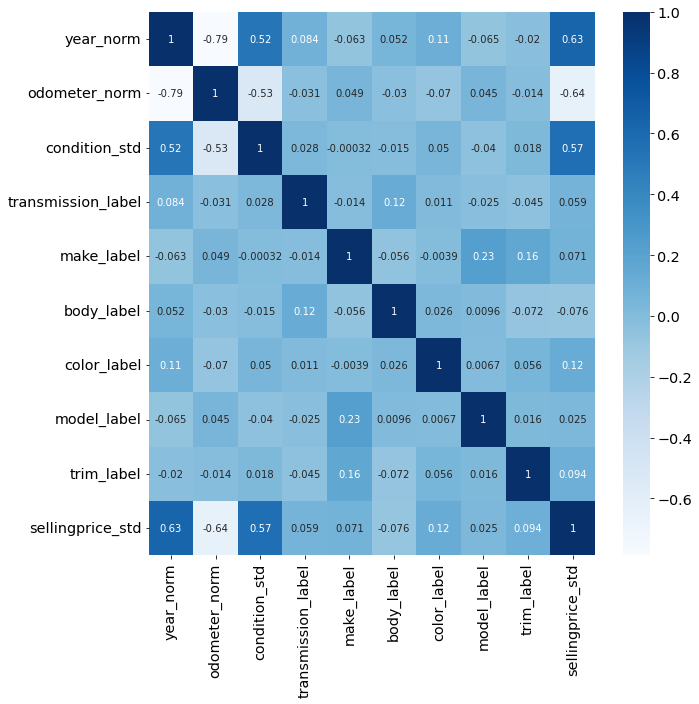

In [88]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[['year_norm', 'odometer_norm', 'condition_std', 'transmission_label', 'make_label', 'body_label', 'color_label', 'model_label', 'trim_label', 'sellingprice_std']].corr(), cmap='Blues', annot=True);

### A. Split Data Train & Test

In [89]:
X = df[['year_norm', 'odometer_norm', 'condition_std', 'transmission_label', 'make_label', 'body_label', 'color_label', 'model_label', 'trim_label']].copy()
y = df[['sellingprice_std']].copy()

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77) # pembagian data test 30%, train 70%

In [91]:
X_train.head()

,year_norm,odometer_norm,condition_std,transmission_label,make_label,body_label,color_label,model_label,trim_label
362368,0.92,0.077060,0.069677,1,8,7,9,9,7
403883,0.64,0.788859,-1.324993,1,9,7,7,9,9
303905,0.68,0.619539,-2.397815,1,9,7,8,9,9
79842,0.88,0.105689,1.035217,1,2,8,5,9,0
252175,0.72,0.464398,-1.217710,1,8,7,6,4,3


In [92]:
X_test.head()

,year_norm,odometer_norm,condition_std,transmission_label,make_label,body_label,color_label,model_label,trim_label
376952,0.88,0.159674,0.927935,1,9,4,8,9,8
456666,0.96,0.094740,0.176959,1,9,6,9,9,9
62208,0.92,0.179415,-1.646839,1,5,8,6,9,1
383316,0.84,0.434172,0.391524,1,8,8,7,6,7
404150,0.84,0.394189,-1.110428,1,8,8,6,9,9


In [93]:
features = ['year_norm', 'odometer_norm', 'condition_std', 'transmission_label', 'make_label', 'body_label', 'color_label', 'model_label', 'trim_label']

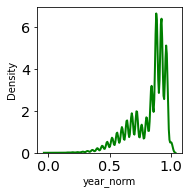

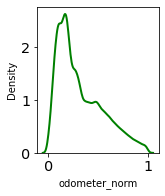

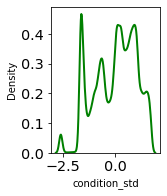

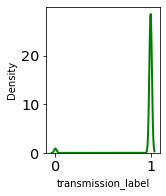

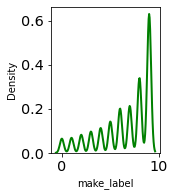

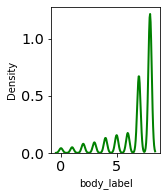

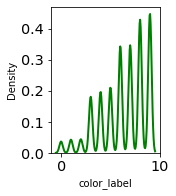

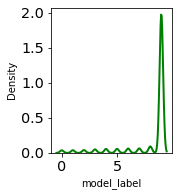

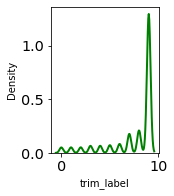

In [94]:
for i in range(0, len(features)):
    plt.figure(figsize=(20,5))
    plt.subplot(2, len(features), i+1)
    sns.kdeplot(x=X_train[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

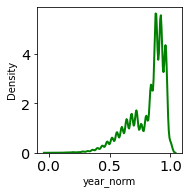

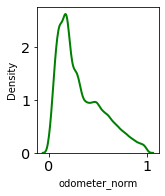

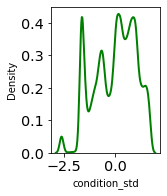

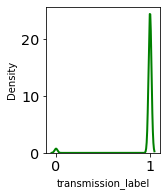

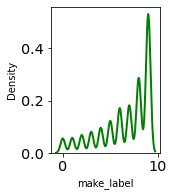

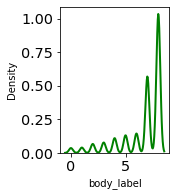

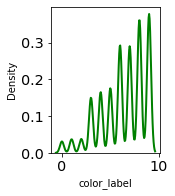

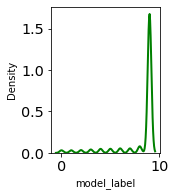

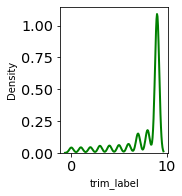

In [95]:
for i in range(0, len(features)):
    plt.figure(figsize=(20,5))
    plt.subplot(2, len(features), i+1)
    sns.kdeplot(x=X_test[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

In [96]:
# Membuat fungsi untuk memudahkan dalam mencoba berbagai algoritma

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def test_metrics_evaluation(model, y_pred, X_train, X_test, y_train, y_test):
  print('RMSE: '+ str(mean_squared_error(y_test, y_pred, squared = False)))
  print('MAE: '+ str(mean_absolute_error(y_test, y_pred)))
  print('R2: '+ str(r2_score(y_test, y_pred)))

def train_metrics_evaluation(model, y_pred_train, X_train, X_test, y_train, y_test):
  print('RMSE: '+ str(mean_squared_error(y_train, y_pred_train, squared = False)))
  print('MAE: '+ str(mean_absolute_error(y_train, y_pred_train)))
  print('R2: '+ str(r2_score(y_train, y_pred_train)))

def show_feature_importance(model):
  feature_importance = pd.Series(model.feature_importances_, index=X.columns)
  ax = feature_importance.nlargest(25).plot(kind='barh', figsize=(10,8))
  ax.invert_yaxis()
  plt.xlabel('Score')
  plt.ylabel('Features')
  plt.title('Feature Importance Score')

def show_best_hyperparameter(model, hyperparameters):
  for key, value in hyperparameters.items():
    print('Best '+key+':', model.get_params()[key])

### Regression

#### Modeling

In [97]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [98]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [99]:
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)

Coefficients: 
 [[ 1.81668435 -1.29156663  0.2649354   0.21153398  0.02882744 -0.0471744
   0.02593022  0.02389878  0.0283866 ]]
Intercept: 
 [-1.71380447]


#### Model Evaluation (Pemilihan dan Perhitungan Metrics)

In [100]:
# Test
test_metrics_evaluation(regressor, y_pred, X_train, X_test, y_train, y_test)

RMSE: 0.6802112452797301
MAE: 0.5247812158485441
R2: 0.5373732339257686


In [101]:
# Train
train_metrics_evaluation(regressor, y_pred_train, X_train, X_test, y_train, y_test)

RMSE: 0.6782014911146482
MAE: 0.5232196143876016
R2: 0.5400169120333771


#### Model Evaluation (Apakah Model sudah Best Fit?)

In [102]:
print('Train Accuracy: ', regressor.score(X_train, y_train))
print('Test Accuracy: ', regressor.score(X_test, y_test))

Train Accuracy:  0.5400169120333771
Test Accuracy:  0.5373732339257686


Model algoritma `Linear Regression` menunjukkan training score > testing score, namun jaraknya tidak terlalu jauh.

#### Hyperparameter Tuning

In [103]:
year_norm = df['year_norm']
odometer_norm = df['odometer_norm']
condition_std = df['condition_std']
transmission_label = df['transmission_label']
make_label = df['make_label']
color_label = df['color_label']
model_label = df['model_label']
trim_label = df['trim_label']
sellingprice_std = df['sellingprice_std']

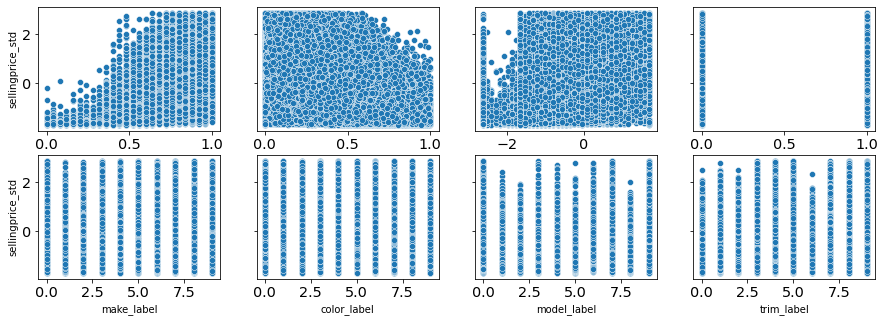

In [104]:
fig, axes = plt.subplots(2, 4, figsize=(15,5), sharey=True)

sns.scatterplot(x=year_norm, y=sellingprice_std, ax=axes[0,0])
sns.scatterplot(x=odometer_norm, y=sellingprice_std, ax=axes[0,1])
sns.scatterplot(x=condition_std, y=sellingprice_std, ax=axes[0,2])
sns.scatterplot(x=transmission_label, y=sellingprice_std, ax=axes[0,3])
sns.scatterplot(x=make_label, y=sellingprice_std, ax=axes[1,0])
sns.scatterplot(x=color_label, y=sellingprice_std, ax=axes[1,1])
sns.scatterplot(x=model_label, y=sellingprice_std, ax=axes[1,2])
sns.scatterplot(x=trim_label, y=sellingprice_std, ax=axes[1,3]);

Pengamatan scatter plot fitur terhadap target, data tidak bersifat linear.

##### Ridge

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from scipy.stats import uniform

# List dari hyperparameter
alpha = [0.01, 0.1, 1, 2, 5, 10, 100, 200, 230, 250, 265, 270, 275, 290, 300, 500]
solver = ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

# Fit model
ridge = Ridge(random_state=77)
clf = RandomizedSearchCV(ridge, hyperparameters, cv=5, random_state=77, scoring='r2')
best_model = clf.fit(X_train, y_train)

# Evaluasi model
y_pred = best_model.predict(X_test)
test_metrics_evaluation(best_model, y_pred, X_train, y_train, X_test, y_test)

RMSE: 0.6802112347325056
MAE: 0.524781030199914
R2: 0.5373732482725716


In [106]:
show_best_hyperparameter(best_model.best_estimator_, hyperparameters)

Best alpha: 0.1
Best solver: cholesky
Best fit_intercept: True


In [107]:
print('Train score: ' + str(best_model.score(X_train, y_train)))
print('Test score: ' + str(best_model.score(X_test, y_test)))

Train score: 0.540016912014684
Test score: 0.5373732482725716


##### Lasso

In [108]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from scipy.stats import uniform

# List dari hyperparameter
alpha = [0.02, 0.024, 0.025, 0.026, 0.03]
selection = ['cyclic', 'random']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, selection=selection, fit_intercept=fit_intercept)

# Fit model
lasso = Lasso(random_state=77)
clf = RandomizedSearchCV(lasso, hyperparameters, cv=5, random_state=77, scoring='r2')
best_model = clf.fit(X_train, y_train)

# Evaluasi model
y_pred = best_model.predict(X_test)
test_metrics_evaluation(best_model, y_pred, X_train, y_train, X_test, y_test)

RMSE: 0.6977910014956065
MAE: 0.5361455861643803
R2: 0.5131514617405373


In [109]:
show_best_hyperparameter(best_model.best_estimator_, hyperparameters)

Best alpha: 0.02
Best selection: random
Best fit_intercept: True


In [110]:
print('Train score: ' + str(best_model.score(X_train, y_train)))
print('Test score: ' + str(best_model.score(X_test, y_test)))

Train score: 0.5153786915371243
Test score: 0.5131514617405373


##### Elastic Net

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from scipy.stats import uniform

# List dari hyperparameter
alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=fit_intercept)

# Fit model
elasticnet = ElasticNet(random_state=77)
clf = RandomizedSearchCV(elasticnet, hyperparameters, cv=5, random_state=77, scoring='r2')
best_model = clf.fit(X_train, y_train)

# Evaluasi model
y_pred = best_model.predict(X_test)
test_metrics_evaluation(best_model, y_pred, X_train, y_train, X_test, y_test)

RMSE: 0.6802091175449304
MAE: 0.524728744528638
R2: 0.5373761281605722


In [112]:
show_best_hyperparameter(best_model.best_estimator_, hyperparameters)

Best alpha: 0.0001
Best l1_ratio: 0.35000000000000003
Best fit_intercept: True


In [113]:
print('Train score: ' + str(best_model.score(X_train, y_train)))
print('Test score: ' + str(best_model.score(X_test, y_test)))

Train score: 0.5400153471333864
Test score: 0.5373761281605722


### Decision Tree

#### Modeling

In [114]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=77)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=77)

In [115]:
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

#### Model Evaluation (Pemilihan dan Perhitungan Metrics)

In [116]:
# Test
test_metrics_evaluation(dt, y_pred, X_train, X_test, y_train, y_test)

RMSE: 0.5973735286820766
MAE: 0.38457001328636775
R2: 0.6431915844706679


In [117]:
# Train
train_metrics_evaluation(dt, y_pred_train, X_train, X_test, y_train, y_test)

RMSE: 0.0063089646875405594
MAE: 7.316447540872747e-05
R2: 0.9999601947297334


#### Model Evaluation (Apakah Model sudah Best Fit?)

In [118]:
print('Train Accuracy: ', dt.score(X_train, y_train))
print('Test Accuracy: ', dt.score(X_test, y_test))

Train Accuracy:  0.9999601947297334
Test Accuracy:  0.6431915844706679


Model algoritma `Decision Tree` menunjukkan training score > testing score dengan jarak yang cukup besar. Hasil train accuracy sangat besar (mendekati 1), hal ini mengindikasi terdapat overfitting sehingga perlu dilakukan tuning hyperparameters.

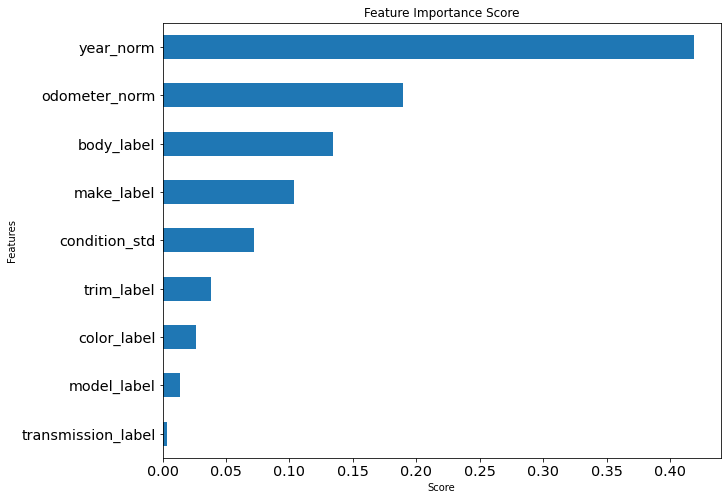

In [119]:
show_feature_importance(dt)

#### Hyperparameter Tuning

In [120]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2'] # Number of features to consider at every split
criterion = ['friedman_mse']
splitter = ['best', 'random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeRegressor(random_state=77)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, n_iter=15, cv=5, random_state=77, scoring='r2')
dt_tuned.fit(X_train, y_train)

# Predict & Evaluation
y_pred = dt_tuned.predict(X_test)
test_metrics_evaluation(dt_tuned, y_pred, X_train, y_train, X_test, y_test)

RMSE: 0.45969517827331746
MAE: 0.31268610008202813
R2: 0.7887080077192863


In [121]:
show_best_hyperparameter(dt_tuned.best_estimator_, hyperparameters)

Best max_depth: 64
Best min_samples_split: 100
Best min_samples_leaf: 10
Best max_features: auto
Best criterion: friedman_mse
Best splitter: random


In [122]:
print('Train score: ' + str(dt_tuned.score(X_train, y_train)))
print('Test score:' + str(dt_tuned.score(X_test, y_test)))

Train score: 0.8026810556459771
Test score:0.7887080077192863


Setelah dilakukan tuning hyperparameter, nilai train score dengan nilai test score tidak terlalu jauh

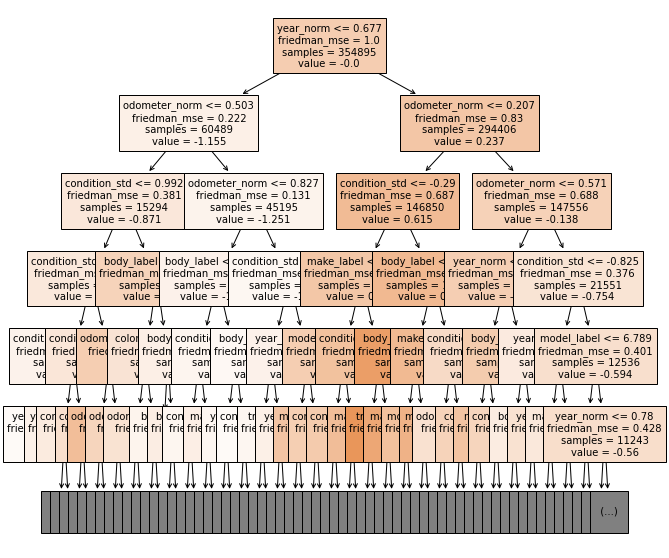

In [123]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dt_tuned.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

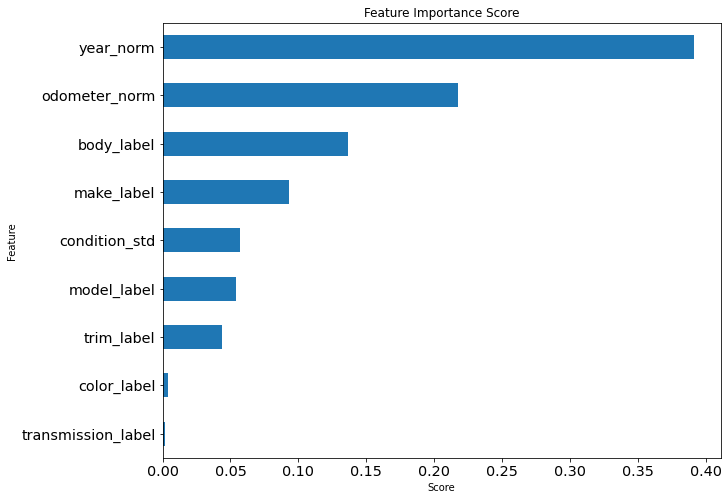

In [124]:
# plt.figsize(10, 8)
feat_importances = pd.Series(dt_tuned.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score');

### Random Forest


#### Modeling

In [125]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=77)
rf.fit(X_train, y_train)

C:\Users\Ella\AppData\Local\Temp/ipykernel_10188/3465360002.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(random_state=77)

In [126]:
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

#### Model Evaluation (Pemilihan dan Perhitungan Metrics)

In [127]:
# Test
test_metrics_evaluation(rf, y_pred, X_train, X_test, y_train, y_test)

RMSE: 0.4455160791529506
MAE: 0.2939102441647664
R2: 0.8015414075748362


In [128]:
# Train
train_metrics_evaluation(rf, y_pred_train, X_train, X_test, y_train, y_test)

RMSE: 0.1665291729131153
MAE: 0.10913082127676182
R2: 0.9722664774903891


#### Model Evaluation (Apakah Model sudah Best Fit?)

In [129]:
print('Train Accuracy: ', rf.score(X_train, y_train))
print('Test Accuracy: ', rf.score(X_test, y_test))

Train Accuracy:  0.9722664774903891
Test Accuracy:  0.8015414075748362


Model algoritma `Random Forest` menunjukkan training score > testing score, namun jaraknya tidak terlalu jauh.

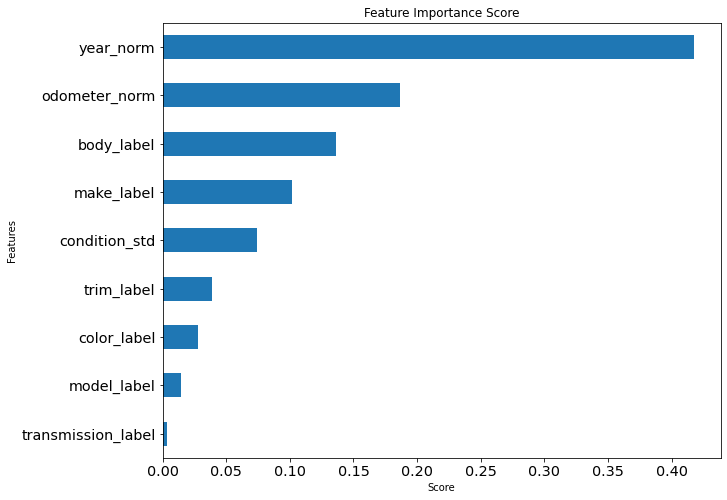

In [130]:
show_feature_importance(rf)

#### Tuning Hyperparameter

In [131]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [15]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Init
rf = RandomForestRegressor(random_state=77)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=77, scoring='r2')
rf_tuned.fit(X_train, y_train)
# Predict & Evaluation
pred = rf_tuned.predict(X_test)
test_metrics_evaluation(rf_tuned, pred, X_train, y_train, X_test, y_test)

C:\Users\Ella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

RMSE: 0.4342646127025491
MAE: 0.28968285246510084
R2: 0.8114389346210081


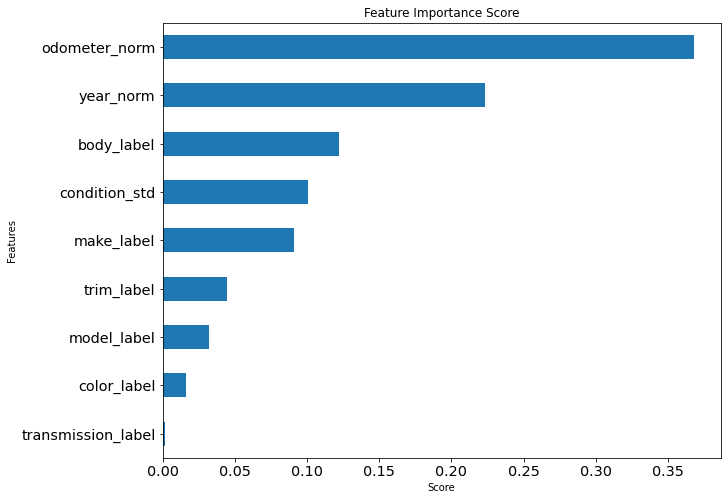

In [132]:
show_feature_importance(rf_tuned.best_estimator_)

In [133]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 15
Best max_features: sqrt
Best max_depth: None
Best min_samples_split: 2
Best min_samples_leaf: 4
Best bootstrap: False


In [134]:
print('Train score: ' + str(rf_tuned.score(X_train, y_train)))
print('Test score:' + str(rf_tuned.score(X_test, y_test)))

Train score: 0.9034519452709769
Test score:0.8114389346210081


### XG Boost

#### Modeling

In [126]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [135]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBRegressor(random_state=77)
xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=77,
             reg_alpha=0, reg_lambda=1, ...)

In [136]:
y_pred = xg.predict(X_test)
y_pred_train = xg.predict(X_train)

#### Model Evaluation (Pemilihan dan Perhitungan Metrics)

In [137]:
# Test
test_metrics_evaluation(xg, y_pred, X_train, X_test, y_train, y_test)

RMSE: 0.43372504073017876
MAE: 0.29601592359373163
R2: 0.8119072161977878


In [138]:
# Train
train_metrics_evaluation(xg, y_pred_train, X_train, X_test, y_train, y_test)

RMSE: 0.42739651566299613
MAE: 0.2920755212859088
R2: 0.8173219620733292


#### Model Evaluation (Apakah Model sudah Best Fit?)

In [139]:
print("Train Accuracy : ",xg.score(X_train,y_train))
print("Test Accuracy : ",xg.score(X_test,y_test))

Train Accuracy :  0.8173219620733292
Test Accuracy :  0.8119072161977878


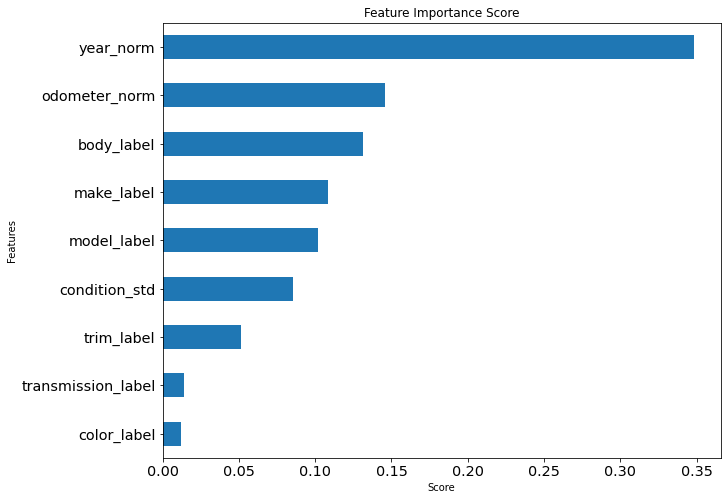

In [140]:
show_feature_importance(xg)

#### Tuning Hyperparameter

In [141]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {'max_depth': [10],
                   'eta':[0.9],
                   'min_child_weight' :[1, 10, 100], 
                   'n_estimators' : [15],
                   'tree_method' : ['auto', 'exact', 'approx', 'hist']
                    }

# Init
xg = XGBRegressor(random_state=77)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=77, scoring='r2')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)
test_metrics_evaluation(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

RMSE: 0.4411016463655464
MAE: 0.30180907000217294
R2: 0.8054548095470848


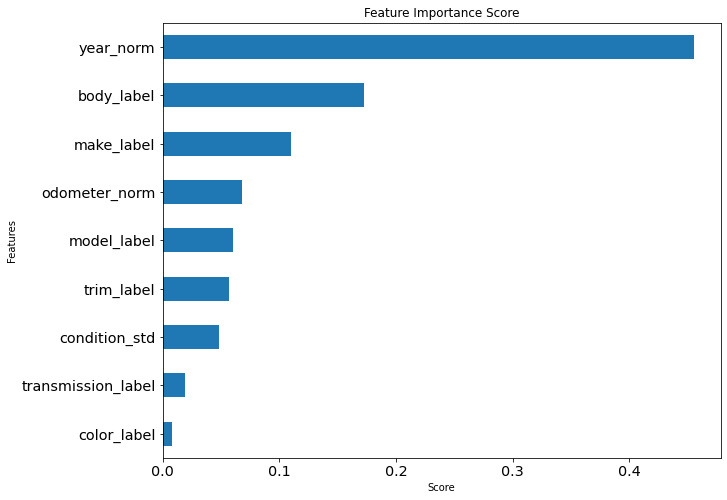

In [142]:
show_feature_importance(xg_tuned.best_estimator_)

In [143]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 10
Best eta: 0.9
Best min_child_weight: 100
Best n_estimators: 15
Best tree_method: hist


In [144]:
print("Train Accuracy : ",xg_tuned.score(X_train,y_train))
print("Test Accuracy : ",xg_tuned.score(X_test,y_test))

Train Accuracy :  0.81832532402922
Test Accuracy :  0.8054548095470848


### LightGBM

In [145]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [146]:
import lightgbm as lgb

In [147]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(random_state=77)
lgbm.fit(X_train, y_train)

LGBMRegressor(random_state=77)

In [148]:
y_pred = lgbm.predict(X_test)
y_pred_train = lgbm.predict(X_train)

In [149]:
# Test
test_metrics_evaluation(lgbm, y_pred, X_train, X_test, y_train, y_test)

RMSE: 0.4432567780013581
MAE: 0.30748992677714637
R2: 0.8035491502389901


In [150]:
# Train
train_metrics_evaluation(lgbm, y_pred_train, X_train, X_test, y_train, y_test)

RMSE: 0.44173551647104015
MAE: 0.30685132228704376
R2: 0.8048587774258096


In [151]:
print('Train Accuracy: ', lgbm.score(X_train, y_train))
print('Test Accuracy: ', lgbm.score(X_test, y_test))

Train Accuracy:  0.8048587774258096
Test Accuracy:  0.8035491502389901


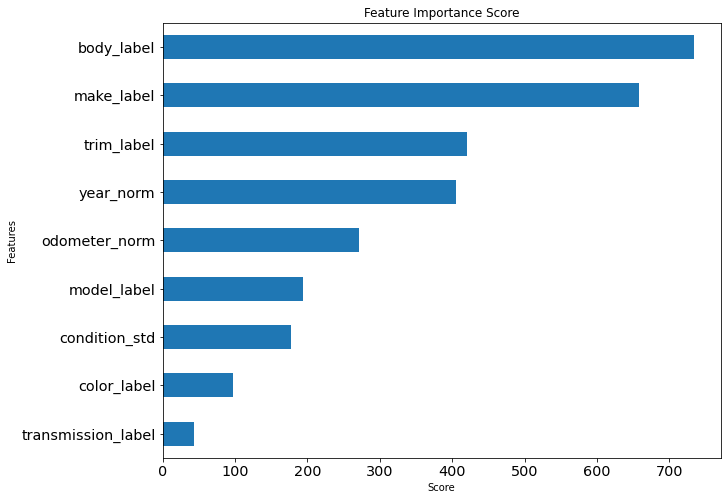

In [152]:
show_feature_importance(lgbm)

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
learning_rate = [0.9]
min_data_in_leaf = [10]
min_sum_hessian_in_leaf = [1, 10, 100]

hyperparameters = dict(learning_rate=learning_rate,
                       min_data_in_leaf=min_data_in_leaf,
                       min_sum_hessian_in_leaf=min_sum_hessian_in_leaf
                      )

# Inisialisasi Model
lgbm = LGBMRegressor(random_state=77)
lgbm_tuned = RandomizedSearchCV(lgbm, hyperparameters, n_iter=15, cv=5, random_state=77, scoring='r2')
lgbm_tuned.fit(X_train, y_train)

# Predict & Evaluation
y_pred = lgbm_tuned.predict(X_test)
test_metrics_evaluation(lgbm_tuned, y_pred, X_train, y_train, X_test, y_test)

C:\Users\Ella\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=15. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current v

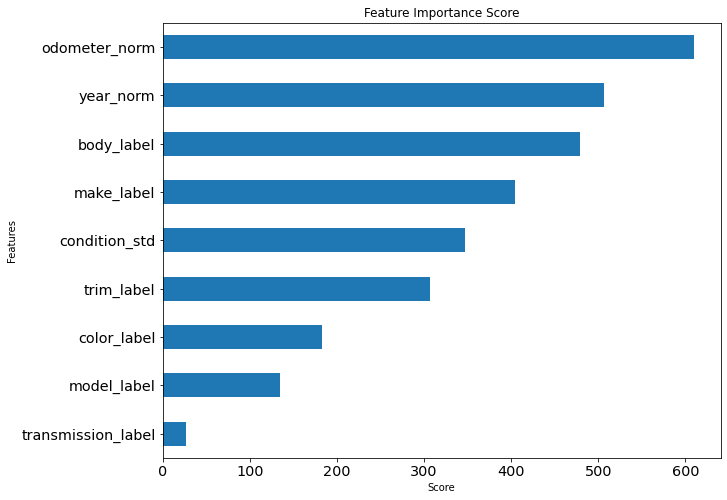

In [154]:
show_feature_importance(lgbm_tuned.best_estimator_)

In [155]:
show_best_hyperparameter(lgbm_tuned.best_estimator_, hyperparameters)

Best learning_rate: 0.9
Best min_data_in_leaf: 10
Best min_sum_hessian_in_leaf: 100


In [156]:
print('Train score: ' + str(lgbm_tuned.score(X_train, y_train)))
print('Test score:' + str(lgbm_tuned.score(X_test, y_test)))

Train score: 0.8201828579399358
Test score:0.812106285734724


## No. 2 Feature Importance

### A. Feature Importance

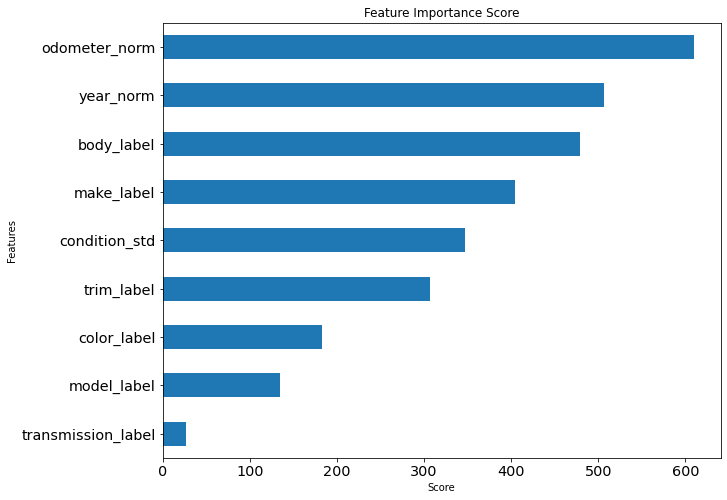

In [159]:
show_feature_importance(lgbm_tuned.best_estimator_)

Berdasarkan pengujian dari beberapa model, kami memilih model LightGBM sebagai model machine learning. Model ini kami pilih dikarenakan:
* Memiliki score train lebih besar dibanding dengan score test.
* Memiliki nilai gap score paling kecil yaitu 0.8% dibandingkan dengan model algoritma lainnya.

### B. Feature Selection

Untuk menguji fitur yang akan digunakan dalam model, maka perlu dilakukan pengujian pengurangan fitur untuk melihat dampaknya pada score akurasi. Untuk iterasi pertama, dilakukan pengurangan fitur 'transmission_label'.

In [249]:
X = df[['odometer_norm', 'year_norm', 'body_label', 'make_label', 'condition_std', 'trim_label', 'color_label', 'model_label']].copy()
y = df[['sellingprice_std']].copy()

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77) # pembagian data test 30%, train 70%

In [251]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(random_state=77)
lgbm.fit(X_train, y_train)

LGBMRegressor(random_state=77)

In [252]:
y_pred = lgbm.predict(X_test)
y_pred_train = lgbm.predict(X_train)

In [253]:
# Test
test_metrics_evaluation(lgbm, y_pred, X_train, X_test, y_train, y_test)

RMSE: 0.4431252202549389
MAE: 0.3070837033527148
R2: 0.8036657453912411


In [254]:
# Train
train_metrics_evaluation(lgbm, y_pred_train, X_train, X_test, y_train, y_test)

RMSE: 0.44199329082442546
MAE: 0.3067818478038342
R2: 0.8046309620134101


In [255]:
print('Train Accuracy: ', lgbm.score(X_train, y_train))
print('Test Accuracy: ', lgbm.score(X_test, y_test))

Train Accuracy:  0.8046309620134101
Test Accuracy:  0.8036657453912411


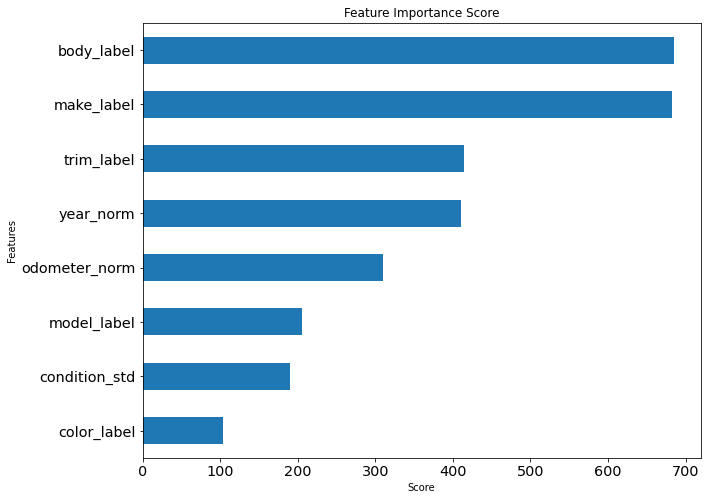

In [256]:
show_feature_importance(lgbm)

In [257]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
learning_rate = [0.9]
min_data_in_leaf = [10]
min_sum_hessian_in_leaf = [1, 10, 100]

hyperparameters = dict(learning_rate=learning_rate,
                       min_data_in_leaf=min_data_in_leaf,
                       min_sum_hessian_in_leaf=min_sum_hessian_in_leaf
                      )

# Inisialisasi Model
lgbm = LGBMRegressor(random_state=77)
lgbm_tuned = RandomizedSearchCV(lgbm, hyperparameters, n_iter=15, cv=5, random_state=77, scoring='r2')
lgbm_tuned.fit(X_train, y_train)

# Predict & Evaluation
y_pred = lgbm_tuned.predict(X_test)
test_metrics_evaluation(lgbm_tuned, y_pred, X_train, y_train, X_test, y_test)

C:\Users\Ella\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=15. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current v

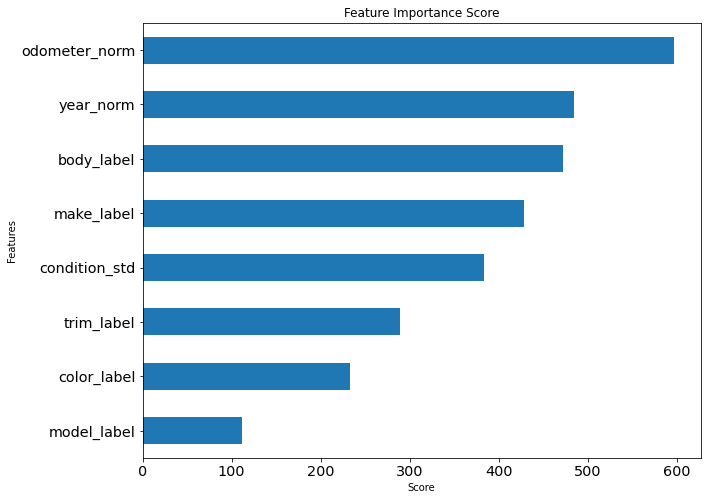

In [258]:
show_feature_importance(lgbm_tuned.best_estimator_)

In [259]:
print('Train score: ' + str(lgbm_tuned.score(X_train, y_train)))
print('Test score:' + str(lgbm_tuned.score(X_test, y_test)))

Train score: 0.8205230074965842
Test score:0.8116253159288402


Pengurangan fitur 'transmission_label' berdampak pada penurunan akurasi model sehingga untuk mencapai model dengan hasil yang lebih optimum, fitur yang digunakan tidak dikurangi (tetap 9 fitur: 'odometer_norm', 'year_norm', 'body_label', 'make_label', 'condition_std', 'trim_label', 'color_label', 'model_label').

## No. 3 Git

Link folder git group Car-a-thon: https://github.com/bagusganjarl/Final-Project-Data-Science